In [302]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [303]:
file = 'openweather_data_2019.csv'

df1 = pd.read_csv(file)

In [304]:
file1 = 'solcast_data_2019_right.csv'
df2 = pd.read_csv(file1)

In [305]:
df_weather = df1.copy()
df_solar = df2.copy()

In [336]:
# Count the number of records
record_count = len(df1)
print(f"Number of records: {record_count}")

Number of records: 38016


In [337]:
# Count the number of records
record_count = len(df2)
print(f"Number of records: {record_count}")

Number of records: 38016


In [306]:
df1.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1546300800,2019-01-01 00:00:00 +0000 UTC,3600,Ulm,48.401082,9.987608,3.69,NaN,2.96,2.05,1.54,5.27,1029,NaN,NaN,95,1.82,251,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1,1546304400,2019-01-01 01:00:00 +0000 UTC,3600,Ulm,48.401082,9.987608,3.51,NaN,2.79,1.78,1.34,5.27,1029,NaN,NaN,95,1.87,240,NaN,NaN,NaN,NaN,NaN,98,804,Clouds,overcast clouds,04n
2,1546308000,2019-01-01 02:00:00 +0000 UTC,3600,Ulm,48.401082,9.987608,3.57,NaN,2.85,3.57,1.42,5.27,1028,NaN,NaN,95,0.45,292,1.79,NaN,NaN,NaN,NaN,99,804,Clouds,overcast clouds,04n
3,1546311600,2019-01-01 03:00:00 +0000 UTC,3600,Ulm,48.401082,9.987608,3.57,NaN,2.85,3.57,1.42,5.27,1028,NaN,NaN,95,0.45,226,1.79,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
4,1546315200,2019-01-01 04:00:00 +0000 UTC,3600,Ulm,48.401082,9.987608,3.63,NaN,2.91,3.63,1.42,5.27,1027,NaN,NaN,95,0.45,275,1.34,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [307]:
df2.head()

,PeriodEnd,PeriodStart,Azimuth,CloudOpacity,Ghi,Zenith,AlbedoDaily
0,2019-01-01T00:00:00Z,2018-12-31T23:00:00Z,-4,62.0,0,154,0.15
1,2019-01-01T01:00:00Z,2019-01-01T00:00:00Z,-33,59.2,0,151,0.16
2,2019-01-01T02:00:00Z,2019-01-01T01:00:00Z,-56,61.1,0,144,0.16
3,2019-01-01T03:00:00Z,2019-01-01T02:00:00Z,-72,62.9,0,135,0.16
4,2019-01-01T04:00:00Z,2019-01-01T03:00:00Z,-85,65.6,0,126,0.16


In [308]:
df1 = df1[['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description']]
df2 = df2[['Ghi']]

In [309]:
df = pd.concat([df1, df2], axis=1)

print(df.columns)

Index(['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description', 'Ghi'],
      dtype='object')


In [310]:
df.head()

,dt_iso,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_description,Ghi
0,2019-01-01 00:00:00 +0000 UTC,3.69,1029,95,1.82,NaN,NaN,100,overcast clouds,0
1,2019-01-01 01:00:00 +0000 UTC,3.51,1029,95,1.87,NaN,NaN,98,overcast clouds,0
2,2019-01-01 02:00:00 +0000 UTC,3.57,1028,95,0.45,NaN,NaN,99,overcast clouds,0
3,2019-01-01 03:00:00 +0000 UTC,3.57,1028,95,0.45,NaN,NaN,100,overcast clouds,0
4,2019-01-01 04:00:00 +0000 UTC,3.63,1027,95,0.45,NaN,NaN,100,overcast clouds,0


In [311]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)

nan_counts = df.isna().sum()

print(nan_counts)

dt_iso                 0
temp                   0
pressure               0
humidity               0
wind_speed             0
rain_1h                0
snow_1h                0
clouds_all             0
weather_description    0
Ghi                    0
dtype: int64


In [312]:
df['dt_iso'] = df['dt_iso'].str.replace(" +0000 UTC", "")
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [313]:
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour
df = df.drop(['dt_iso'], axis=1)

In [314]:
df.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,weather_description,Ghi,year,month,day,hour
0,3.69,1029,95,1.82,0.0,0.0,100,overcast clouds,0,2019,1,1,0
1,3.51,1029,95,1.87,0.0,0.0,98,overcast clouds,0,2019,1,1,1
2,3.57,1028,95,0.45,0.0,0.0,99,overcast clouds,0,2019,1,1,2
3,3.57,1028,95,0.45,0.0,0.0,100,overcast clouds,0,2019,1,1,3
4,3.63,1027,95,0.45,0.0,0.0,100,overcast clouds,0,2019,1,1,4


In [315]:
# this is for a model that we use later and not further important
import copy
df1 = copy.deepcopy(df)

In [316]:
weather_desc_encoded = pd.get_dummies(df['weather_description'], prefix='weather')
df = pd.concat([df, weather_desc_encoded], axis=1)

df = df.drop(['weather_description'], axis=1)

df.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,month,day,hour,weather_broken clouds,weather_few clouds,weather_heavy intensity rain,weather_heavy snow,weather_light rain,weather_light snow,weather_moderate rain,weather_overcast clouds,weather_scattered clouds,weather_sky is clear,weather_snow,weather_very heavy rain
0,3.69,1029,95,1.82,0.0,0.0,100,0,2019,1,1,0,False,False,False,False,False,False,False,True,False,False,False,False
1,3.51,1029,95,1.87,0.0,0.0,98,0,2019,1,1,1,False,False,False,False,False,False,False,True,False,False,False,False
2,3.57,1028,95,0.45,0.0,0.0,99,0,2019,1,1,2,False,False,False,False,False,False,False,True,False,False,False,False
3,3.57,1028,95,0.45,0.0,0.0,100,0,2019,1,1,3,False,False,False,False,False,False,False,True,False,False,False,False
4,3.63,1027,95,0.45,0.0,0.0,100,0,2019,1,1,4,False,False,False,False,False,False,False,True,False,False,False,False


In [317]:
# df = df3.copy()

In [318]:
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.2)
val_size = len(df) - train_size - test_size

train = df[:train_size]
test = df[train_size:train_size + test_size]
val = df[train_size + test_size:]

In [319]:
X_train_1variable = train.drop(['temp'], axis=1)
y_train_1variable = train['temp']

X_test_1variable = test.drop(['temp'], axis=1)
y_test_1variable = test['temp']

X_val_1variable = val.drop(['temp'], axis=1)
y_val_1variable = val['temp']

In [320]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_1variable, y_train_1variable)

LinearRegression()

In [321]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test_1variable)
mse = mean_squared_error(y_test_1variable, y_pred)

print("Root Mean Squared Error:", np.sqrt(mse))

Root Mean Squared Error: 5.926856536259451


In [322]:


# Calculate metrics
mse = mean_squared_error(y_test_1variable, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_1variable, y_pred)
r2 = r2_score(y_test_1variable, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Squared Error (MSE): 35.127628401401374
Root Mean Squared Error (RMSE): 5.926856536259451
Mean Absolute Error (MAE): 4.910143986811311
R² Score: 0.4215909168736912


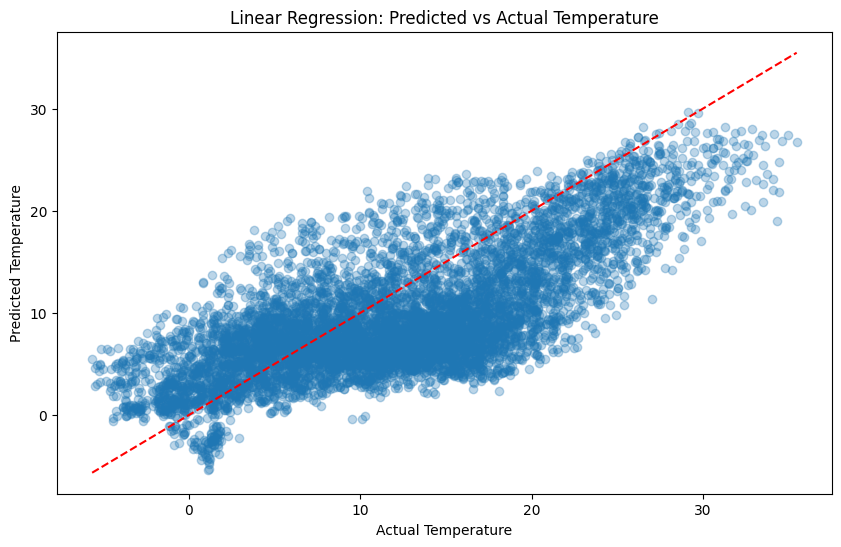

In [323]:
# Plotting Predicted vs Actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_1variable, y_pred, alpha=0.3)
plt.plot([min(y_test_1variable), max(y_test_1variable)], [min(y_test_1variable), max(y_test_1variable)], color='red', linestyle='--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Linear Regression: Predicted vs Actual Temperature')
plt.show()




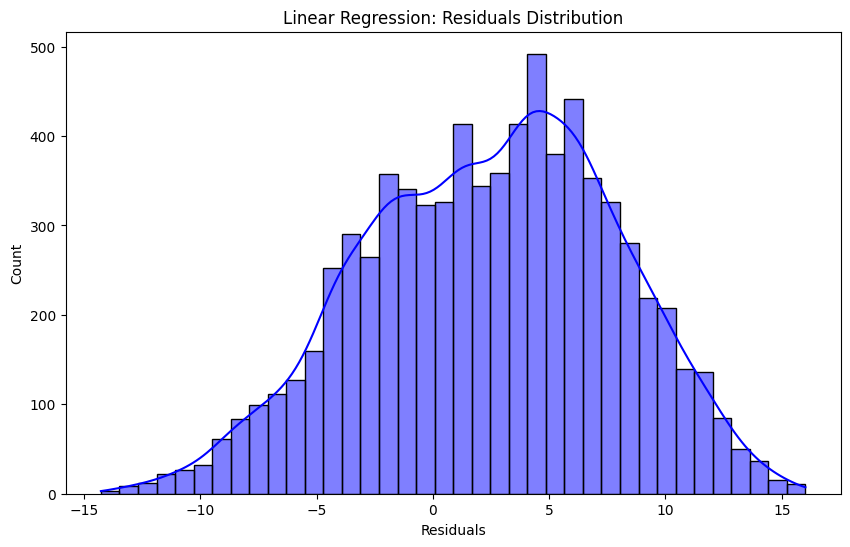

In [324]:
# 
residuals = y_test_1variable - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Linear Regression: Residuals Distribution')
plt.show()

In [325]:
X_train_1variable = X_train_1variable[['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi', 'month', 'day', 'hour']]
X_test_1variable = X_test_1variable[['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi', 'month', 'day', 'hour']]
X_val_1variable = X_val_1variable[['pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi', 'month', 'day', 'hour']]

In [326]:
X_train_1variable.head()

,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,month,day,hour
0,1029,95,1.82,0.0,0.0,100,0,1,1,0
1,1029,95,1.87,0.0,0.0,98,0,1,1,1
2,1028,95,0.45,0.0,0.0,99,0,1,1,2
3,1028,95,0.45,0.0,0.0,100,0,1,1,3
4,1027,95,0.45,0.0,0.0,100,0,1,1,4


In [327]:
X_train_1variable['hour_sin'] = np.sin(2 * np.pi * X_train_1variable['hour'] / 24)
X_train_1variable['hour_cos'] = np.cos(2 * np.pi * X_train_1variable['hour'] / 24)

X_train_1variable['day_sin'] = np.sin(2 * np.pi * X_train_1variable['day'] / 31)
X_train_1variable['day_cos'] = np.cos(2 * np.pi * X_train_1variable['day'] / 31)

X_train_1variable['month_sin'] = np.sin(2 * np.pi * X_train_1variable['month'] / 12)
X_train_1variable['month_cos'] = np.cos(2 * np.pi * X_train_1variable['month'] / 12)

X_train_1variable = X_train_1variable.drop(['hour', 'day', 'month'], axis=1)

X_test_1variable['hour_sin'] = np.sin(2 * np.pi * X_test_1variable['hour'] / 24)
X_test_1variable['hour_cos'] = np.cos(2 * np.pi * X_test_1variable['hour'] / 24)

X_test_1variable['day_sin'] = np.sin(2 * np.pi * X_test_1variable['day'] / 31)
X_test_1variable['day_cos'] = np.cos(2 * np.pi * X_test_1variable['day'] / 31)

X_test_1variable['month_sin'] = np.sin(2 * np.pi * X_test_1variable['month'] / 12)
X_test_1variable['month_cos'] = np.cos(2 * np.pi * X_test_1variable['month'] / 12)

X_test_1variable = X_test_1variable.drop(['hour', 'day', 'month'], axis=1)

In [328]:
X_train_1variable.head()

,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,1029,95,1.82,0.0,0.0,100,0,0.000000,1.000000,0.201299,0.97953,0.5,0.866025
1,1029,95,1.87,0.0,0.0,98,0,0.258819,0.965926,0.201299,0.97953,0.5,0.866025
2,1028,95,0.45,0.0,0.0,99,0,0.500000,0.866025,0.201299,0.97953,0.5,0.866025
3,1028,95,0.45,0.0,0.0,100,0,0.707107,0.707107,0.201299,0.97953,0.5,0.866025
4,1027,95,0.45,0.0,0.0,100,0,0.866025,0.500000,0.201299,0.97953,0.5,0.866025


In [329]:
from sklearn.preprocessing import StandardScaler

X_coeff_train = X_train_1variable
X_coeff_test = X_test_1variable
columns = X_coeff_train.columns

scaler = StandardScaler()
scaler.fit(X_coeff_train)
X_coeff_train = scaler.transform(X_coeff_train)
X_coeff_test = scaler.transform(X_coeff_test)

model_coef = LinearRegression()
model_coef.fit(X_coeff_train, y_train_1variable)

feature_coef_pairs = list(zip(columns, model_coef.coef_))

feature_coef_pairs.sort(key=lambda pair: abs(pair[1]))

for feature, coef in feature_coef_pairs:
    print(f"{feature}: {coef}")

day_cos: 0.043317156863673274
snow_1h: -0.10531360347261588
wind_speed: 0.15218565159450131
day_sin: -0.23787290059226485
hour_cos: -0.2509744579743397
pressure: -0.2761290413374781
rain_1h: 0.3040532503244273
clouds_all: 0.4424656510433555
hour_sin: -0.7039818535067991
Ghi: 1.3329414710691332
humidity: -2.356161463085469
month_sin: -3.7275949894740332
month_cos: -3.981050228152798


In [330]:
sorted(abs(model_coef.coef_))

[np.float64(0.043317156863673274),
 np.float64(0.10531360347261588),
 np.float64(0.15218565159450131),
 np.float64(0.23787290059226485),
 np.float64(0.2509744579743397),
 np.float64(0.2761290413374781),
 np.float64(0.3040532503244273),
 np.float64(0.4424656510433555),
 np.float64(0.7039818535067991),
 np.float64(1.3329414710691332),
 np.float64(2.356161463085469),
 np.float64(3.7275949894740332),
 np.float64(3.981050228152798)]

In [331]:
X_train_1variable = X_train_1variable.drop(['day_cos', 'snow_1h', 'wind_speed'], axis=1)
X_test_1variable = X_test_1variable.drop(['day_cos', 'snow_1h', 'wind_speed'], axis=1)

In [332]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3]
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_1variable, y_train_1variable)

print("Best parameters:", grid.best_params_)

y_pred = grid.predict(X_test_1variable)
mse = mean_squared_error(y_test_1variable, y_pred)
print("Root Mean Squared Error:", np.sqrt(mse))

Best parameters: {'poly__degree': 2}
Root Mean Squared Error: 3.3192813502049603


In [333]:

# Print the best parameters
print("Best parameters:", grid.best_params_)

# Predict the test set
y_pred = grid.predict(X_test_1variable)

# Calculate metrics
mse = mean_squared_error(y_test_1variable, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_1variable, y_pred)
r2 = r2_score(y_test_1variable, y_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2) 

Best parameters: {'poly__degree': 2}
Mean Squared Error (MSE): 11.017628681818463
Root Mean Squared Error (RMSE): 3.3192813502049603
Mean Absolute Error (MAE): 2.7001773489134635
R² Score: 0.8185844933436353


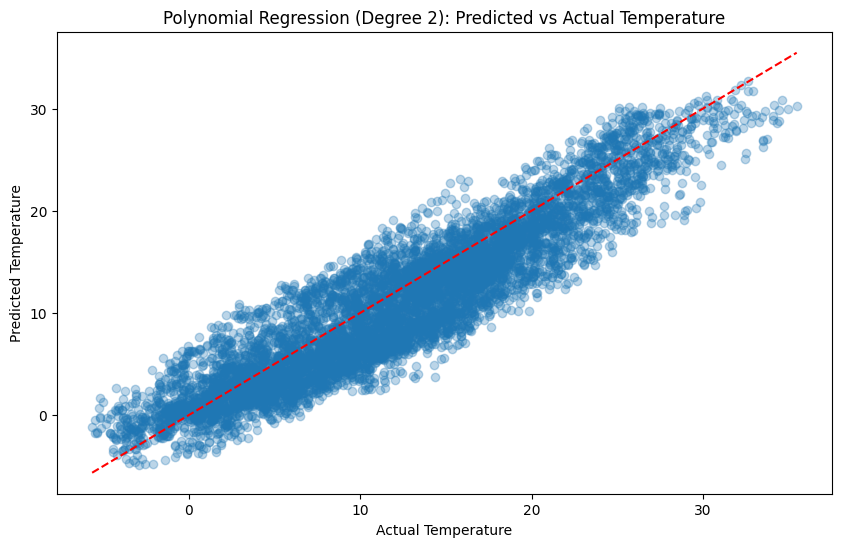

In [215]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_1variable, y_pred, alpha=0.3)
plt.plot([min(y_test_1variable), max(y_test_1variable)], [min(y_test_1variable), max(y_test_1variable)], color='red', linestyle='--')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Polynomial Regression (Degree 2): Predicted vs Actual Temperature')
plt.show()


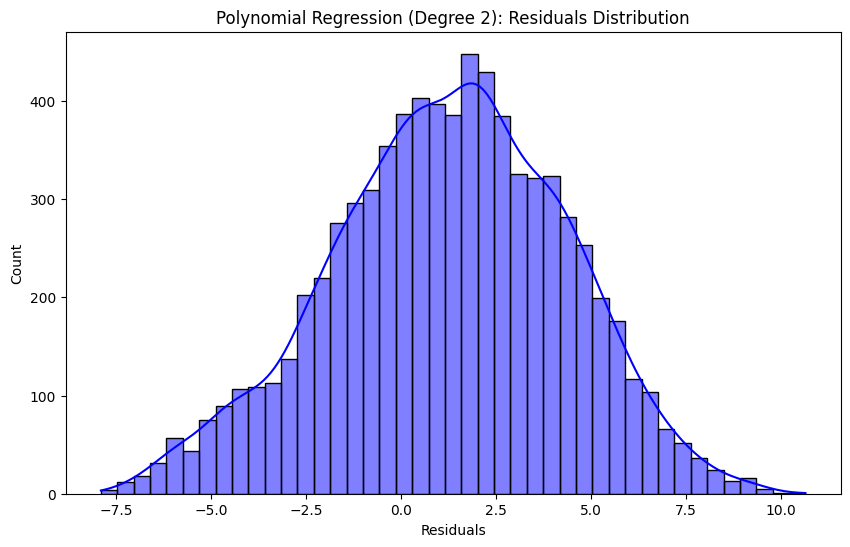

In [216]:
residuals = y_test_1variable - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Polynomial Regression (Degree 2): Residuals Distribution')
plt.show()


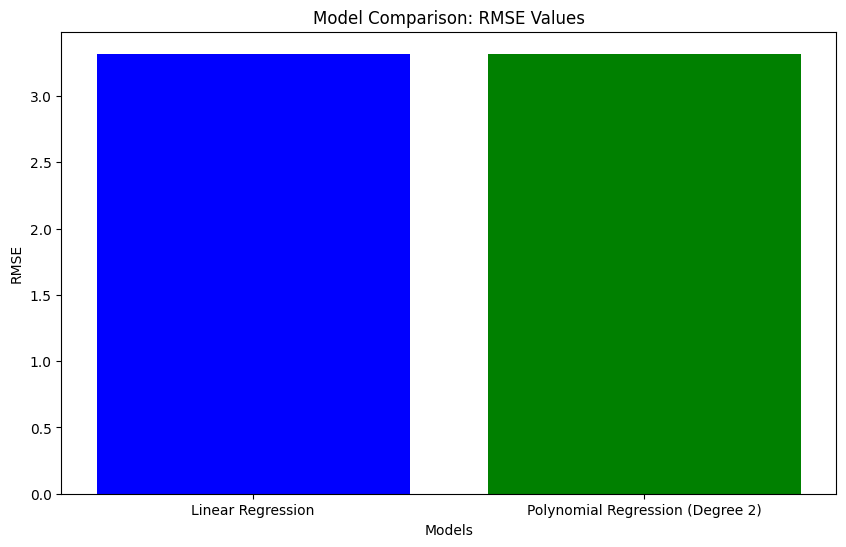

In [217]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Polynomial Regression (Degree 2)']
rmse_values = [3.316, np.sqrt(mse)]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Model Comparison: RMSE Values')
plt.show()


In [218]:
### Proposed Solution

# We are adding the columns 'dew_point' and 'feels_like' to our data before training the model to predict the temperature. Including these additional features can improve the model's accuracy by providing more relevant information about the environmental conditions.


In [219]:
dff1 = df_weather[['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'dew_point', 'feels_like']]
dff2 = df_solar[['Ghi']]

In [220]:
df_main = pd.concat([dff1, dff2], axis=1)

print(df_main.columns)

Index(['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description', 'dew_point',
       'feels_like', 'Ghi'],
      dtype='object')


In [221]:
df = df_main.copy()

In [222]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)
df['dew_point'] = df['dew_point'].fillna(0)

nan_counts = df.isna().sum()

print(nan_counts)

dt_iso                 0
temp                   0
pressure               0
humidity               0
wind_speed             0
rain_1h                0
snow_1h                0
clouds_all             0
weather_description    0
dew_point              0
feels_like             0
Ghi                    0
dtype: int64


In [223]:
df['dt_iso'] = df['dt_iso'].str.replace(" +0000 UTC", "")
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [224]:
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour
df = df.drop(['dt_iso'], axis=1)
df = df.drop(['weather_description'], axis=1)

In [225]:
df.columns

Index(['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'dew_point', 'feels_like', 'Ghi', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [226]:
df2 = df.copy()

In [227]:
df2.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,month,day,hour
0,3.69,1029,95,1.82,0.0,0.0,100,2.96,2.05,0,2019,1,1,0
1,3.51,1029,95,1.87,0.0,0.0,98,2.79,1.78,0,2019,1,1,1
2,3.57,1028,95,0.45,0.0,0.0,99,2.85,3.57,0,2019,1,1,2
3,3.57,1028,95,0.45,0.0,0.0,100,2.85,3.57,0,2019,1,1,3
4,3.63,1027,95,0.45,0.0,0.0,100,2.91,3.63,0,2019,1,1,4


In [228]:
def plot_target_distribution(df, target_col):
    plt.figure(figsize=(18, 6))

    # Combined Histogram and KDE Plot
    sns.histplot(df[target_col], kde=True, bins=100)
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + target_col)

    plt.show()

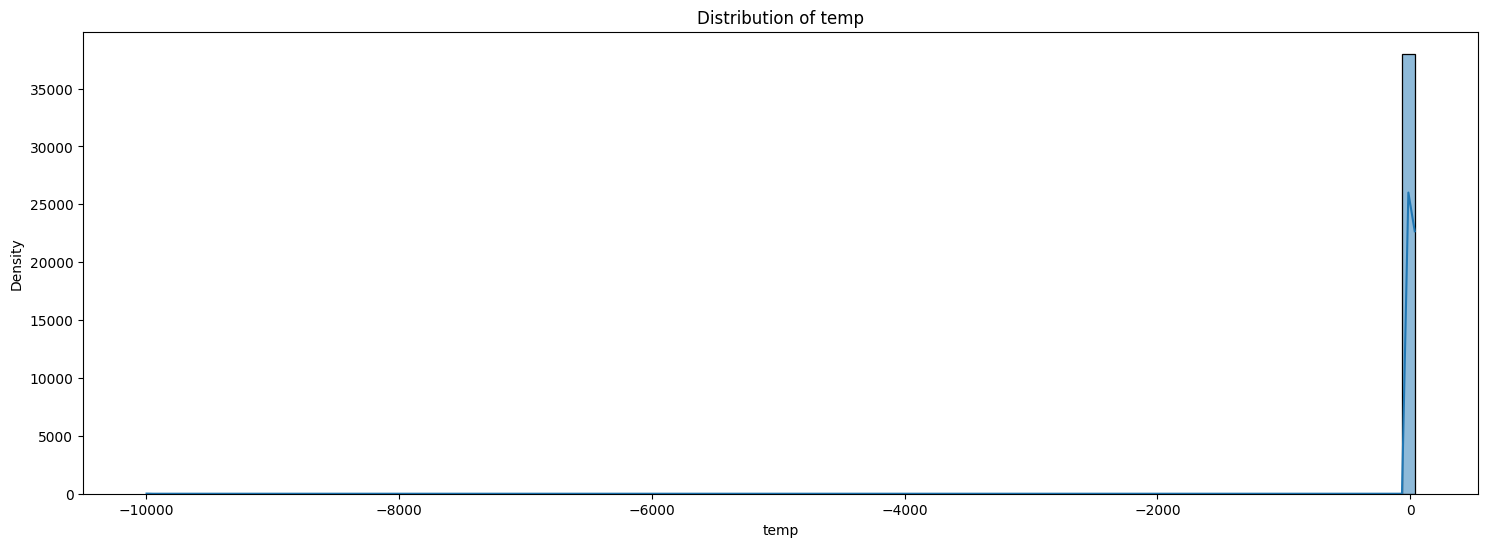

In [229]:
plot_target_distribution(df2, 'temp')

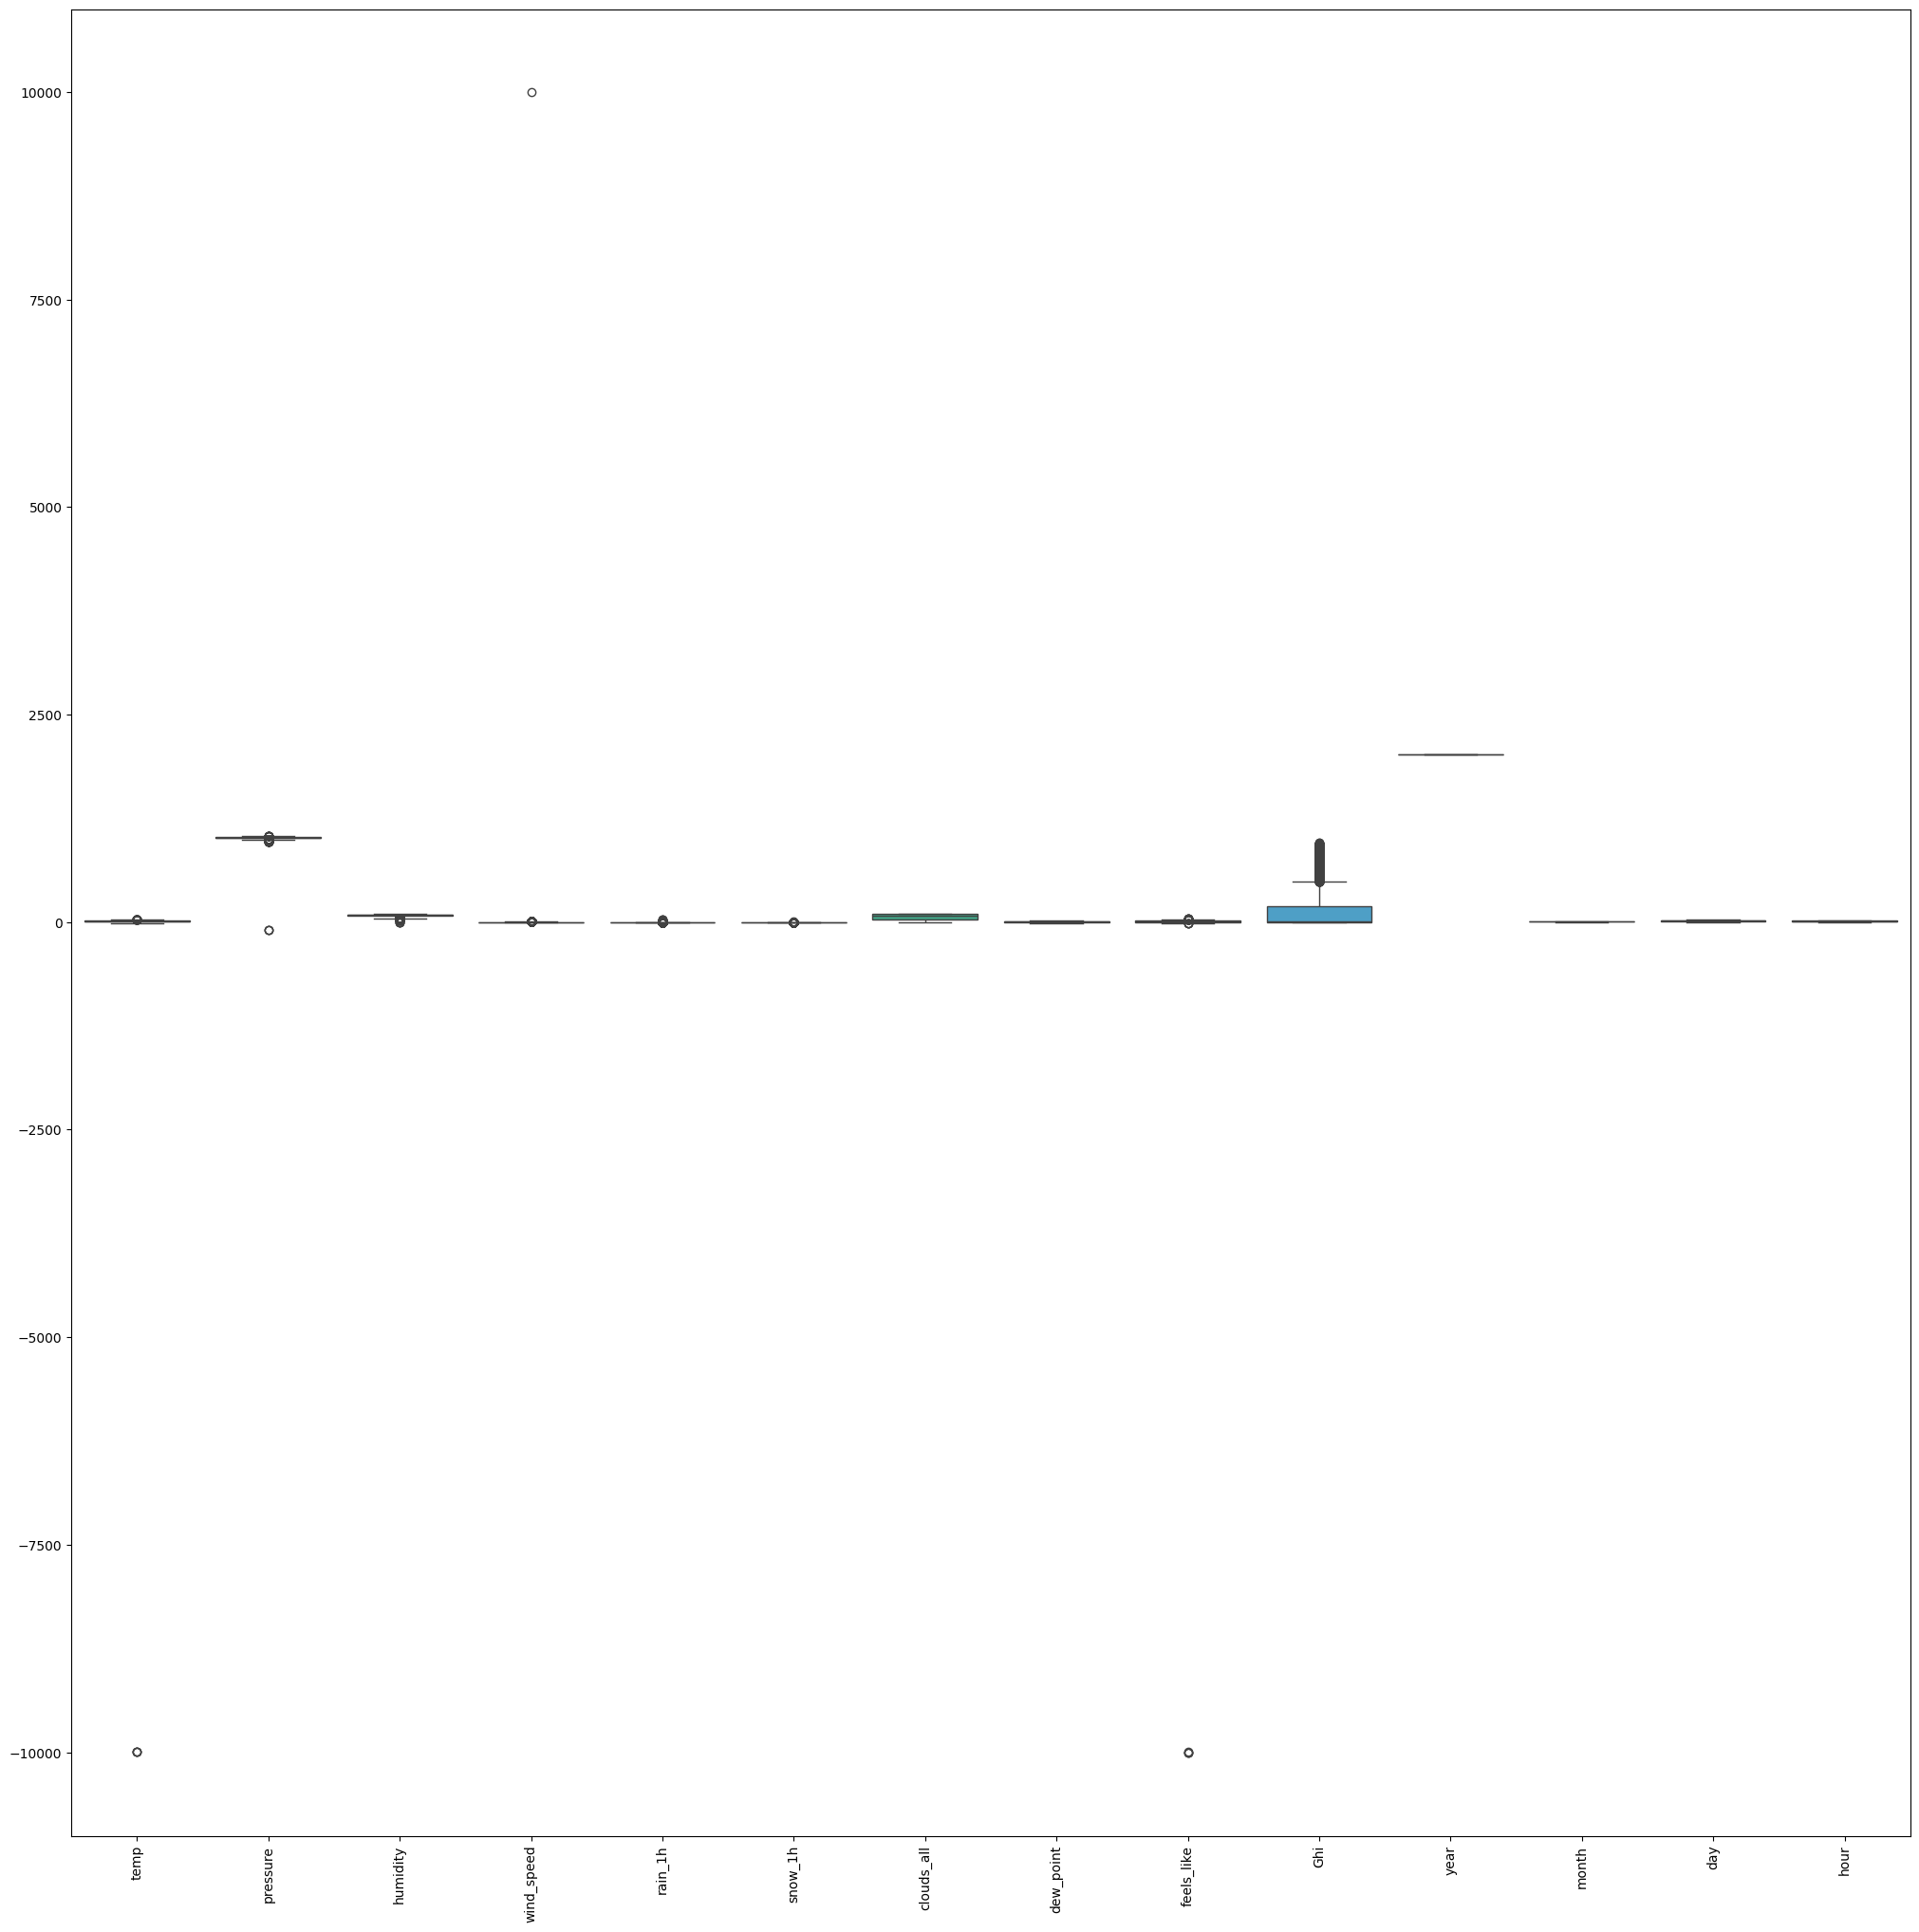

In [230]:
# check the outliers by plot the box plot
plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

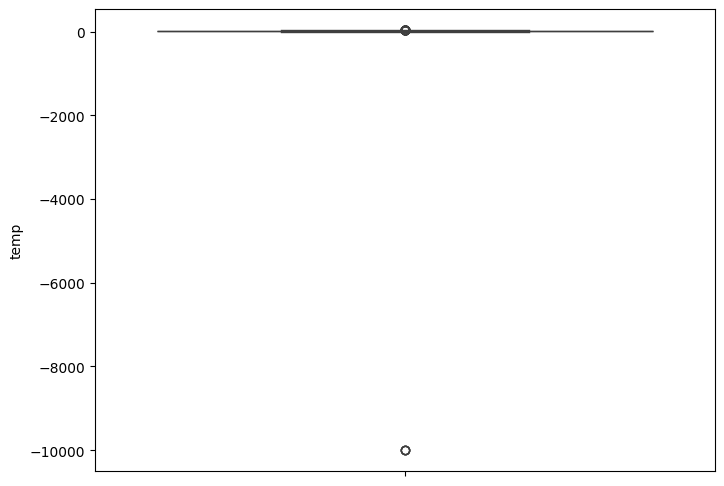

In [231]:
# check the outliers by plot the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df2['temp'])
plt.xticks(rotation=90)
plt.show()

In [232]:
df['temp'].describe()

count    38016.000000
mean         8.578210
std        102.956253
min      -9998.370000
25%          3.390000
50%          9.010000
75%         15.250000
max         35.460000
Name: temp, dtype: float64

In [233]:
df2[df2['temp']<=-50]

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,month,day,hour
36951,-9998.37,-100,0,2.66,0.0,0.00,0,0.0,-10005.37,241,2023,3,20,15
37214,-9998.37,1004,0,7.12,0.0,0.00,77,0.0,-10005.37,450,2023,3,31,14
37378,-9998.37,1016,0,9999.00,0.0,0.00,71,0.0,-9998.37,397,2023,4,7,10
37759,-9998.37,1012,0,2.20,0.0,0.37,57,0.0,-10005.37,68,2023,4,23,7


In [234]:
# Drop outliers where 'temp' is less than -50
df_without_outliers = df2[df2['temp'] >= -50]
df_without_outliers.shape

(38012, 14)

In [235]:
df2.shape

(38016, 14)

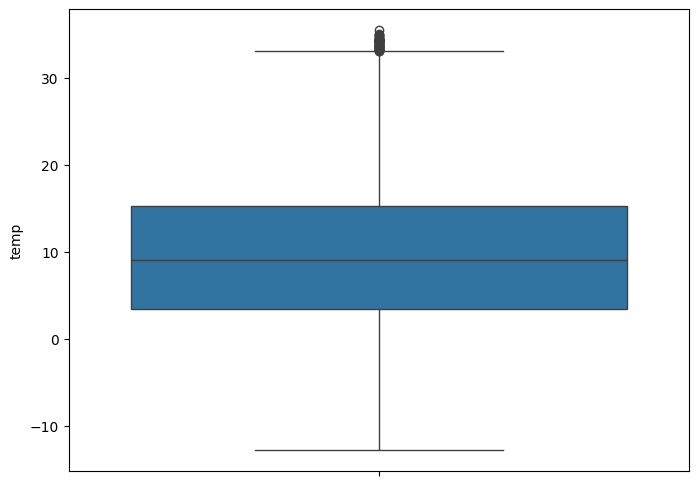

In [236]:
# check the outliers by plot the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_without_outliers['temp'])
plt.xticks(rotation=90)
plt.show()

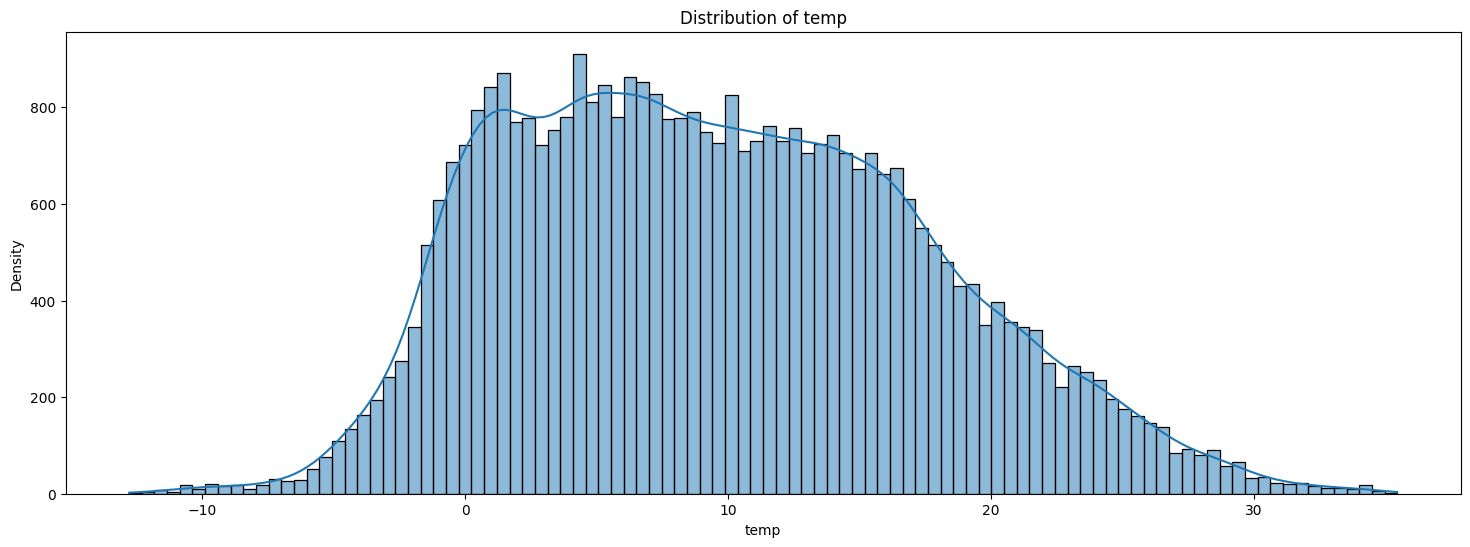

In [237]:
plot_target_distribution(df_without_outliers, 'temp')

# Proposed Solution
We are adding the columns 'dew_point' and 'feels_like' to our data before training the model to predict the temperature. Including these additional features can improve the model's accuracy by providing more relevant information about the environmental conditions.

In [238]:
dff1 = df_weather[['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'dew_point', 'feels_like']]
dff2 = df_solar[['Ghi']]

In [239]:
df_main = pd.concat([dff1, dff2], axis=1)

print(df_main.columns)

Index(['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'snow_1h', 'clouds_all', 'weather_description', 'dew_point',
       'feels_like', 'Ghi'],
      dtype='object')


In [240]:
df = df_main.copy()

In [241]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)
df['dew_point'] = df['dew_point'].fillna(0)

nan_counts = df.isna().sum()

print(nan_counts)

dt_iso                 0
temp                   0
pressure               0
humidity               0
wind_speed             0
rain_1h                0
snow_1h                0
clouds_all             0
weather_description    0
dew_point              0
feels_like             0
Ghi                    0
dtype: int64


In [242]:
df['dt_iso'] = df['dt_iso'].str.replace(" +0000 UTC", "")
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [243]:
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour
df = df.drop(['dt_iso'], axis=1)
df = df.drop(['weather_description'], axis=1)

In [244]:
df.columns

Index(['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
       'clouds_all', 'dew_point', 'feels_like', 'Ghi', 'year', 'month', 'day',
       'hour'],
      dtype='object')

In [245]:
df2 = df.copy()

In [246]:
df2['hour_sin'] = np.sin(2 * np.pi * df2['hour'] / 24)
df2['hour_cos'] = np.cos(2 * np.pi * df2['hour'] / 24)

df2['day_sin'] = np.sin(2 * np.pi * df2['day'] / 31)
df2['day_cos'] = np.cos(2 * np.pi * df2['day'] / 31)

df2['month_sin'] = np.sin(2 * np.pi * df2['month'] / 12)
df2['month_cos'] = np.cos(2 * np.pi * df2['month'] / 12)

df3 = df2[df2['temp'] >= -50]

df2 = df2.drop(['hour', 'day', 'month'], axis=1)

In [247]:
df2.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,3.69,1029,95,1.82,0.0,0.0,100,2.96,2.05,0,2019,0.000000,1.000000,0.201299,0.97953,0.5,0.866025
1,3.51,1029,95,1.87,0.0,0.0,98,2.79,1.78,0,2019,0.258819,0.965926,0.201299,0.97953,0.5,0.866025
2,3.57,1028,95,0.45,0.0,0.0,99,2.85,3.57,0,2019,0.500000,0.866025,0.201299,0.97953,0.5,0.866025
3,3.57,1028,95,0.45,0.0,0.0,100,2.85,3.57,0,2019,0.707107,0.707107,0.201299,0.97953,0.5,0.866025
4,3.63,1027,95,0.45,0.0,0.0,100,2.91,3.63,0,2019,0.866025,0.500000,0.201299,0.97953,0.5,0.866025


In [248]:
def plot_target_distribution(df, target_col):
    plt.figure(figsize=(18, 6))

    # Combined Histogram and KDE Plot
    sns.histplot(df[target_col], kde=True, bins=100)
    plt.xlabel(target_col)
    plt.ylabel('Density')
    plt.title('Distribution of ' + target_col)

    plt.show()

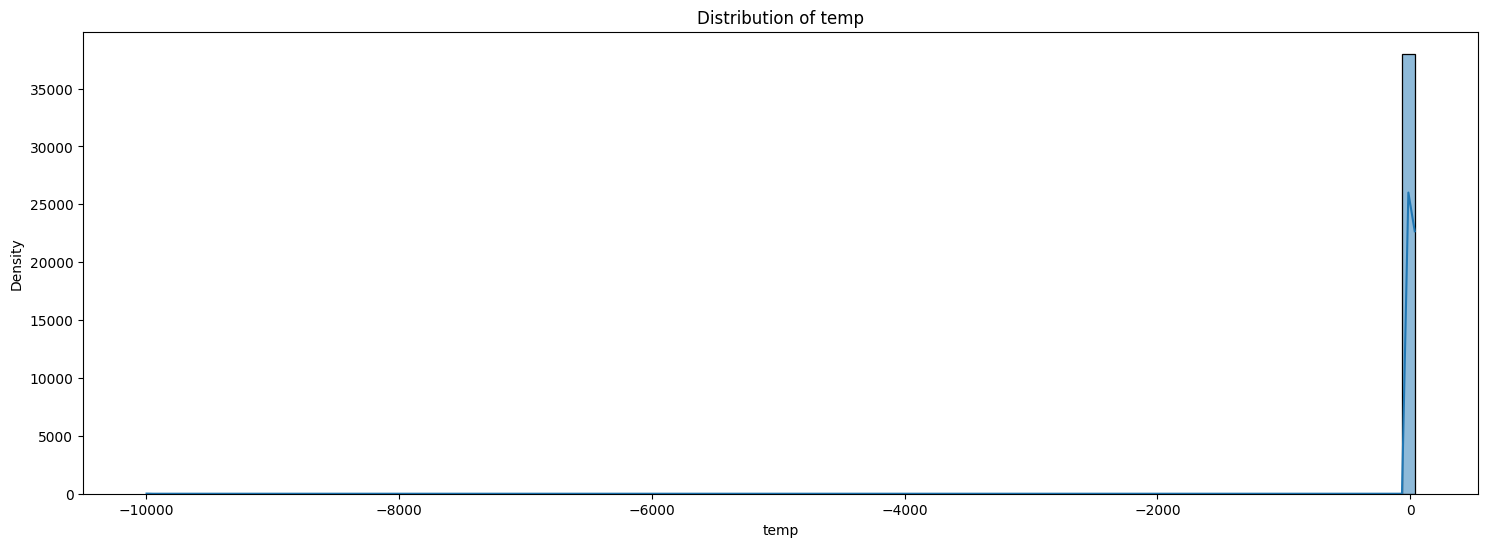

In [249]:
plot_target_distribution(df2, 'temp')

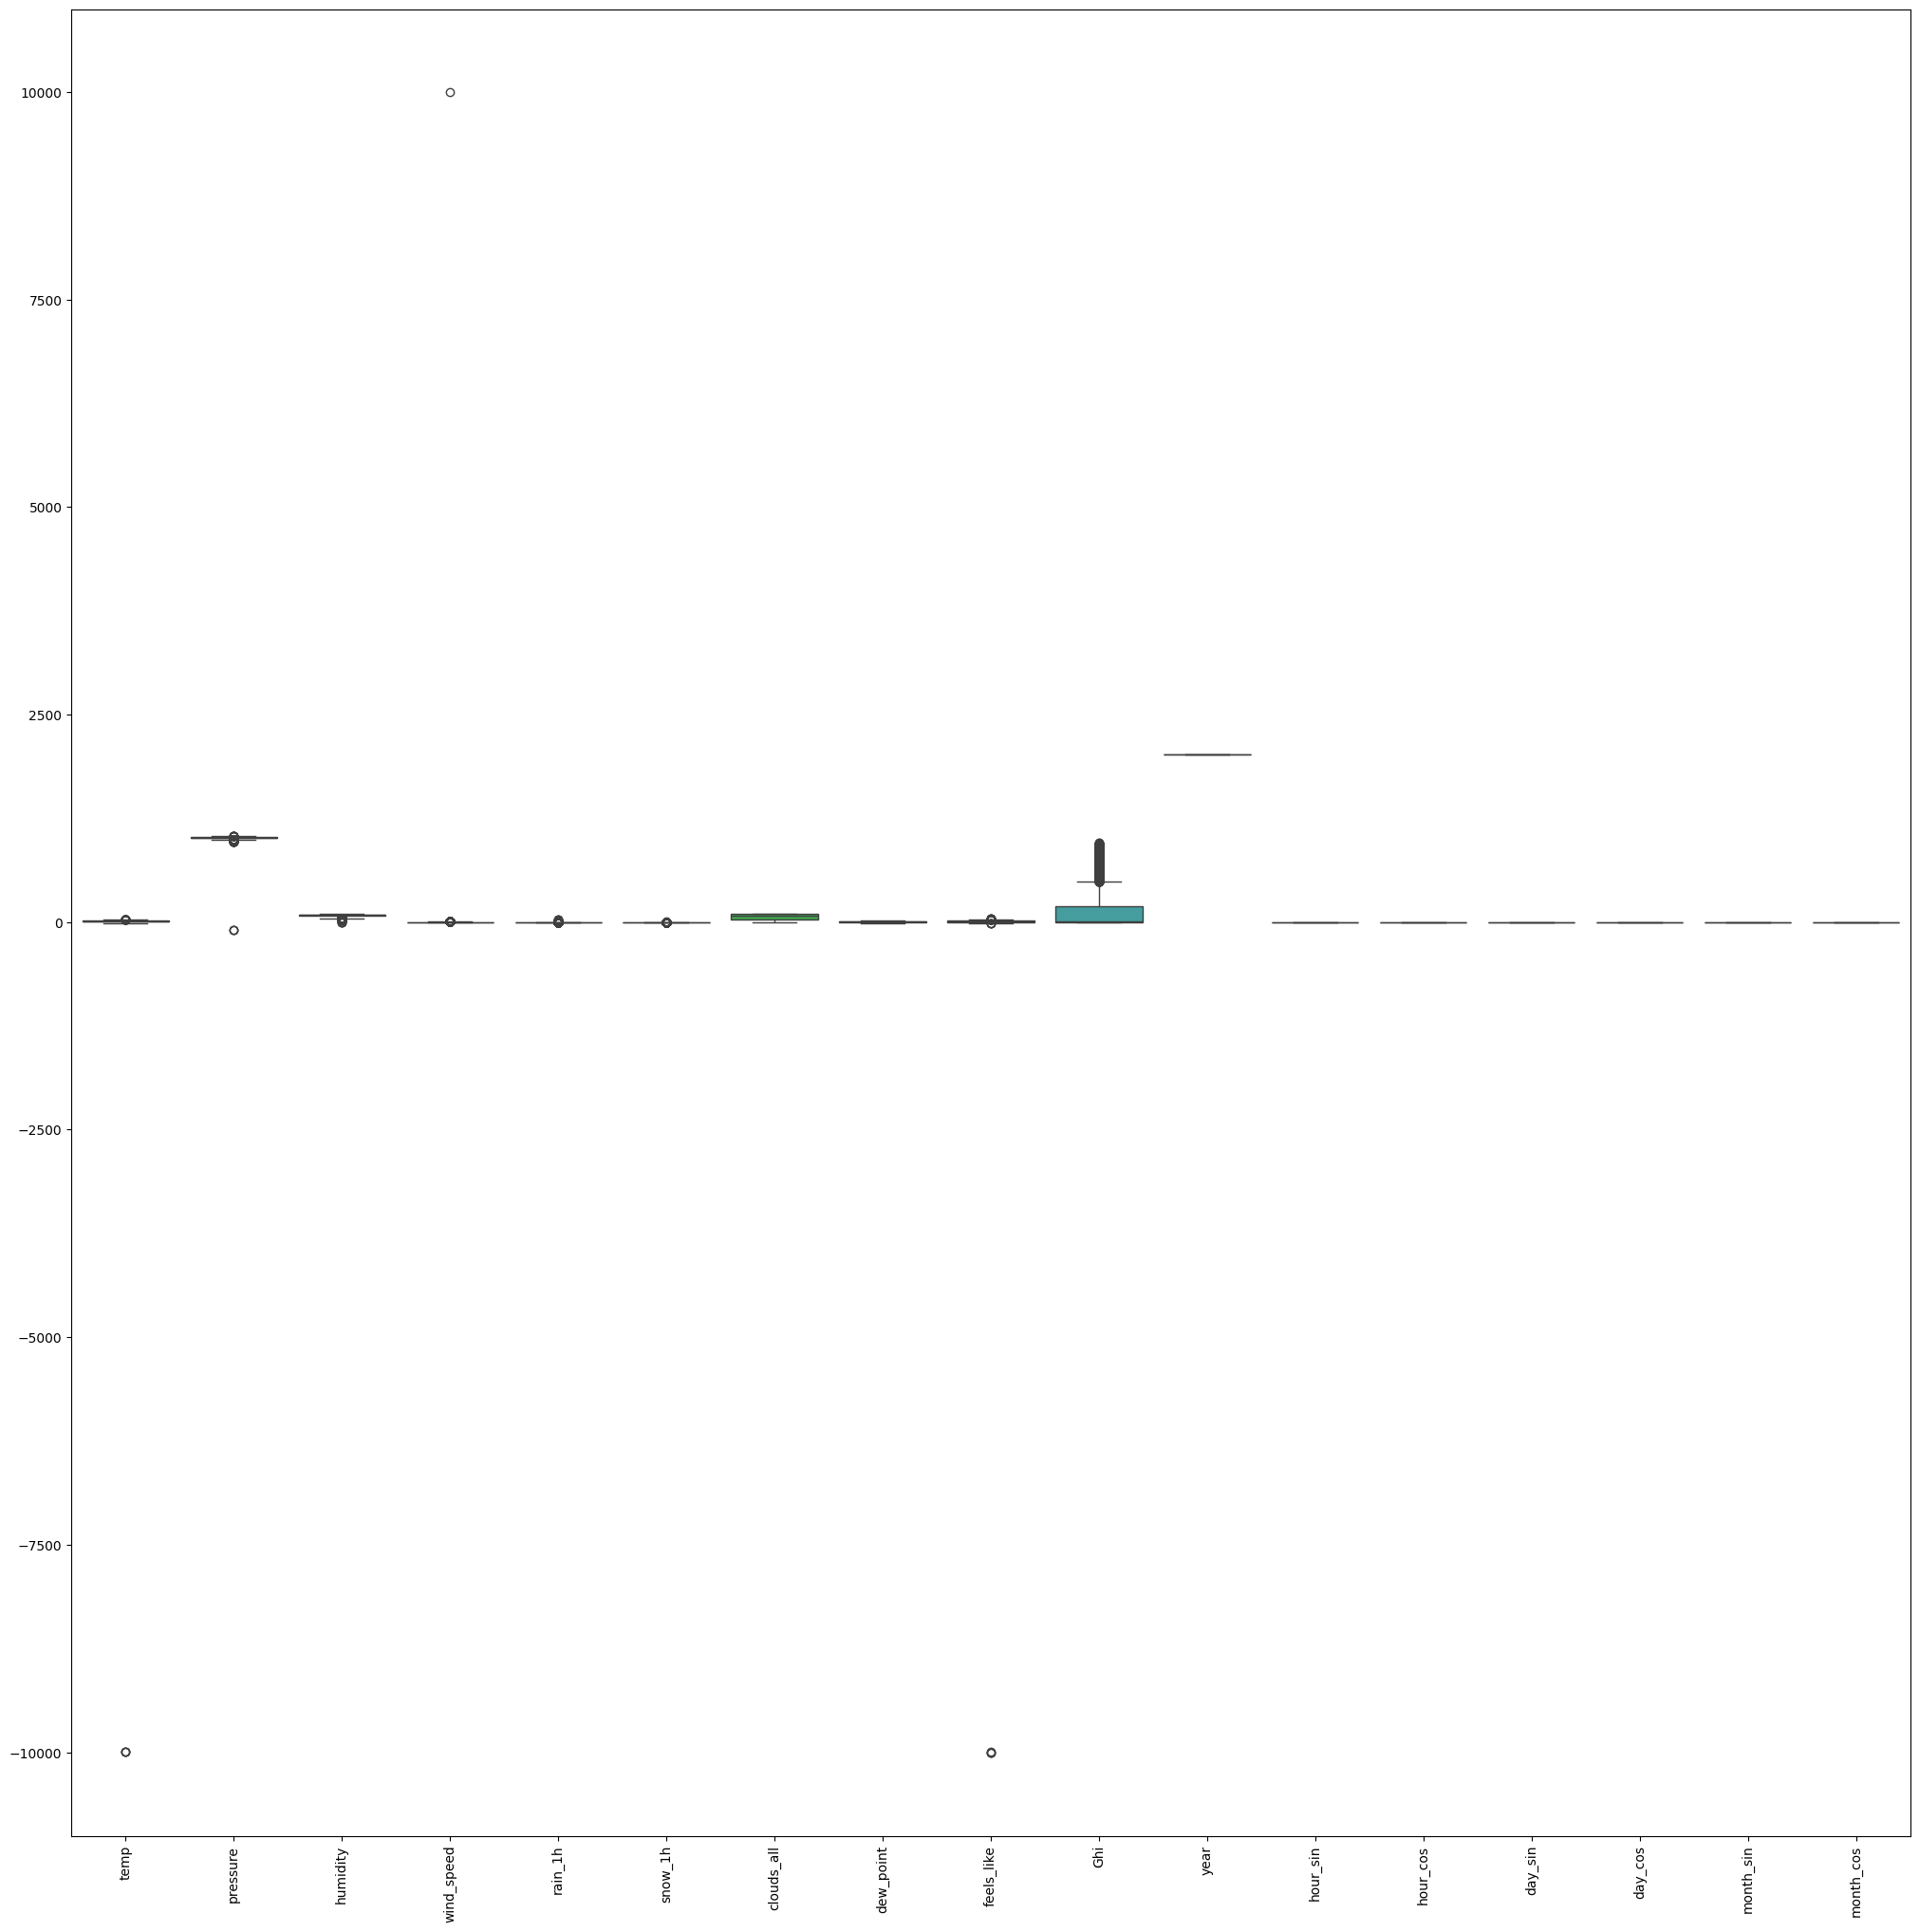

In [250]:
# check the outliers by plot the box plot
plt.figure(figsize=(25,25))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

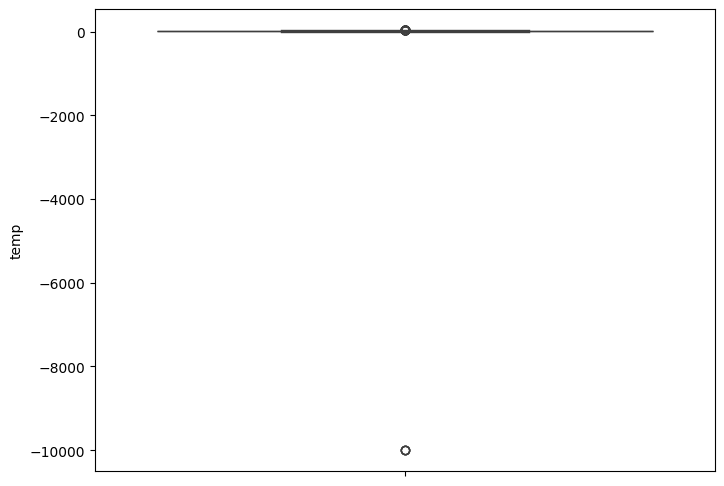

In [251]:
# check the outliers by plot the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df2['temp'])
plt.xticks(rotation=90)
plt.show()

In [252]:
df['temp'].describe()

count    38016.000000
mean         8.578210
std        102.956253
min      -9998.370000
25%          3.390000
50%          9.010000
75%         15.250000
max         35.460000
Name: temp, dtype: float64

In [253]:
df2[df2['temp']<=-50]

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
36951,-9998.37,-100,0,2.66,0.0,0.00,0,0.0,-10005.37,241,2023,-0.707107,-0.707107,-7.907757e-01,-0.612106,1.000000,6.123234e-17
37214,-9998.37,1004,0,7.12,0.0,0.00,77,0.0,-10005.37,450,2023,-0.500000,-0.866025,-2.449294e-16,1.000000,1.000000,6.123234e-17
37378,-9998.37,1016,0,9999.00,0.0,0.00,71,0.0,-9998.37,397,2023,0.500000,-0.866025,9.884683e-01,0.151428,0.866025,-5.000000e-01
37759,-9998.37,1012,0,2.20,0.0,0.37,57,0.0,-10005.37,68,2023,0.965926,-0.258819,-9.987165e-01,-0.050649,0.866025,-5.000000e-01


In [254]:
# Drop outliers where 'temp' is less than -50
df_without_outliers = df2[df2['temp'] >= -50]
df_without_outliers.shape

(38012, 17)

In [255]:
df2.shape

(38016, 17)

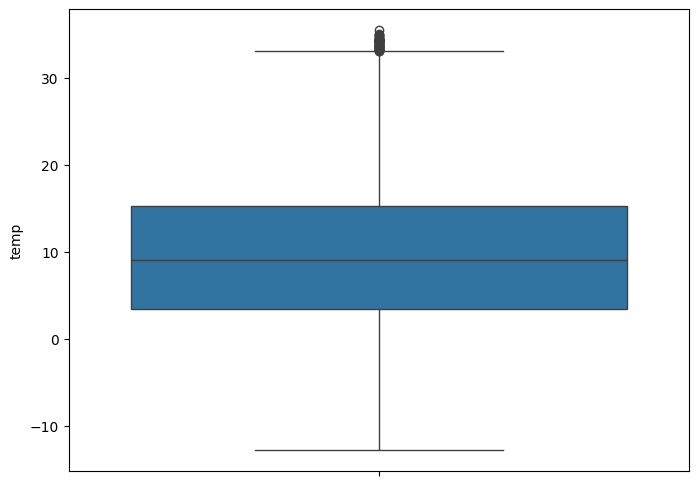

In [256]:
# check the outliers by plot the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_without_outliers['temp'])
plt.xticks(rotation=90)
plt.show()

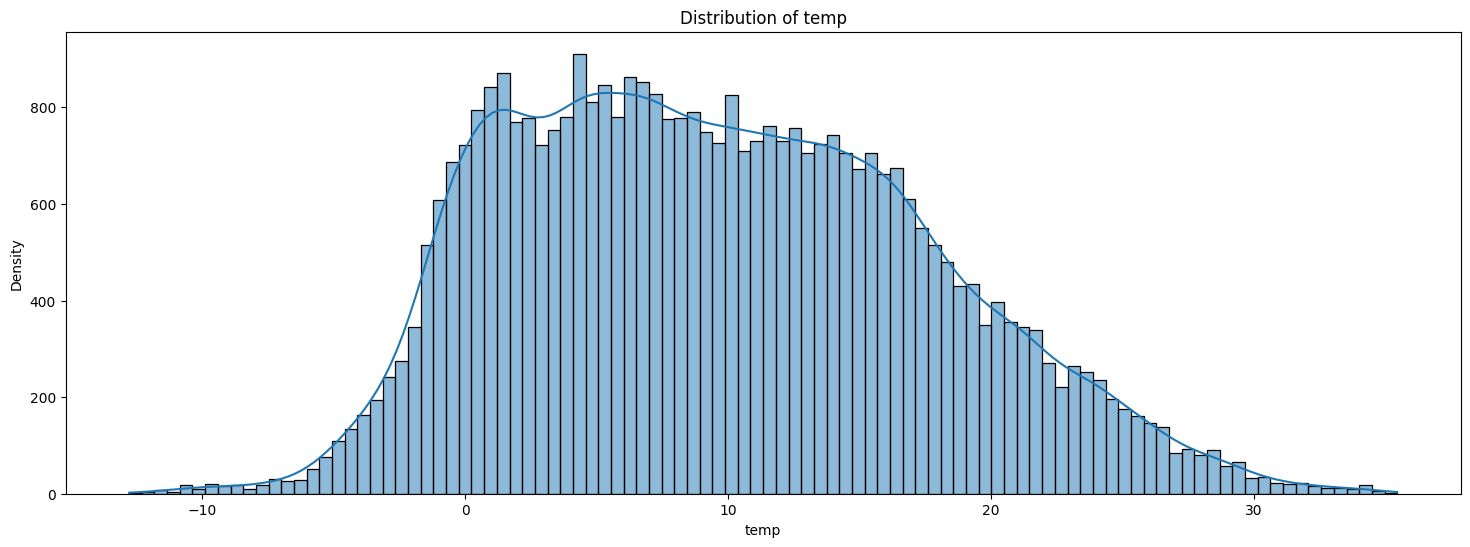

In [257]:
plot_target_distribution(df_without_outliers, 'temp')

# Handle the Outliers #



Handle outliers in the specified columns of a DataFrame by calculating the interquartile range (IQR) and defining lower and upper bounds for each column. Outliers, which fall outside these bounds, are replaced with the mean value of the non-outlier data for that column.

In [258]:
# fix the outliers
def replace_outliers_with_mean(df, columns):
    for column in columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the mean
        mean_value = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].mean()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value

    return df




In [259]:
data_new = replace_outliers_with_mean(df_without_outliers, df_without_outliers.columns)

data_new.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,3.69,1029.0,95.0,1.82,0.0,0.0,100.0,2.96,2.05,0.0,2019.0,0.000000,1.000000,0.201299,0.97953,0.5,0.866025
1,3.51,1029.0,95.0,1.87,0.0,0.0,98.0,2.79,1.78,0.0,2019.0,0.258819,0.965926,0.201299,0.97953,0.5,0.866025
2,3.57,1028.0,95.0,0.45,0.0,0.0,99.0,2.85,3.57,0.0,2019.0,0.500000,0.866025,0.201299,0.97953,0.5,0.866025
3,3.57,1028.0,95.0,0.45,0.0,0.0,100.0,2.85,3.57,0.0,2019.0,0.707107,0.707107,0.201299,0.97953,0.5,0.866025
4,3.63,1027.0,95.0,0.45,0.0,0.0,100.0,2.91,3.63,0.0,2019.0,0.866025,0.500000,0.201299,0.97953,0.5,0.866025


In [260]:
def plot_graph(df, features_list):
  for col in features_list:
    fig, ax =plt.subplots(1,2, figsize=(15,3))
    sns.distplot(df[col], ax=ax[0]).set(title="Distribution")
    sns.boxplot(x= col,data=df, ax=ax[1]).set(title="Outlier")
    plt.suptitle(f'{col.title()}',weight='bold')
    plt.tight_layout()

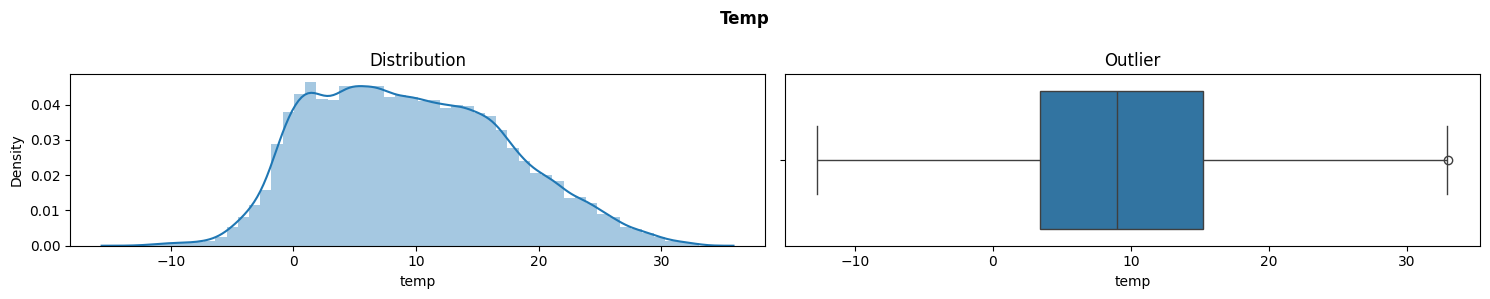

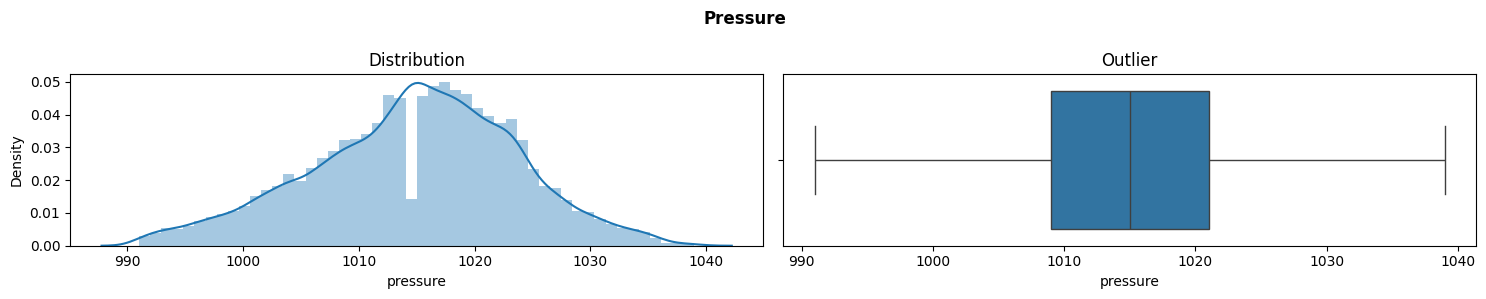

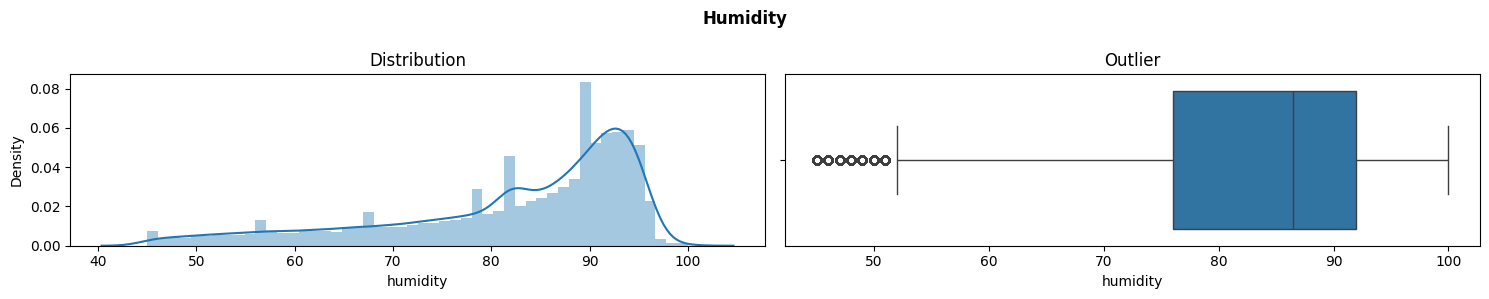

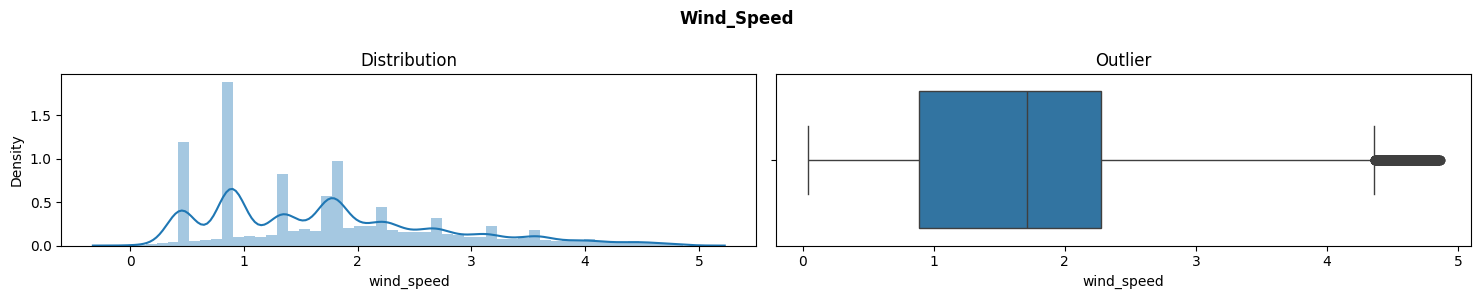

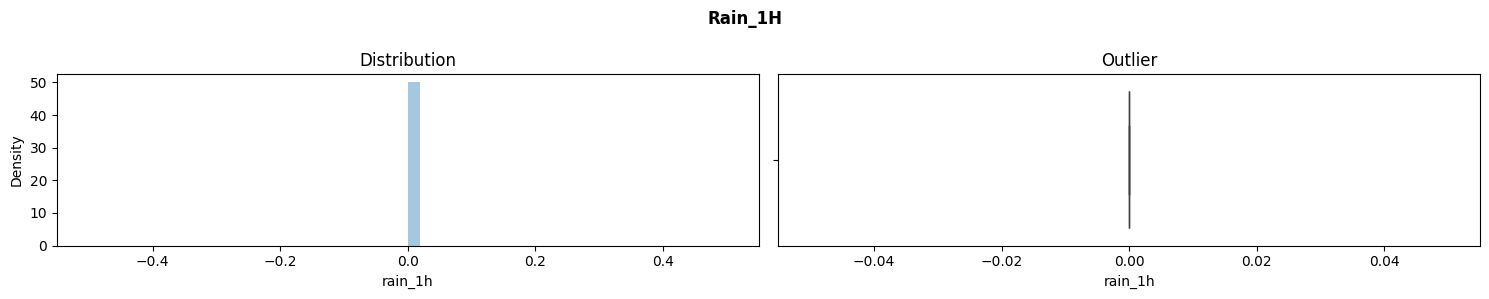

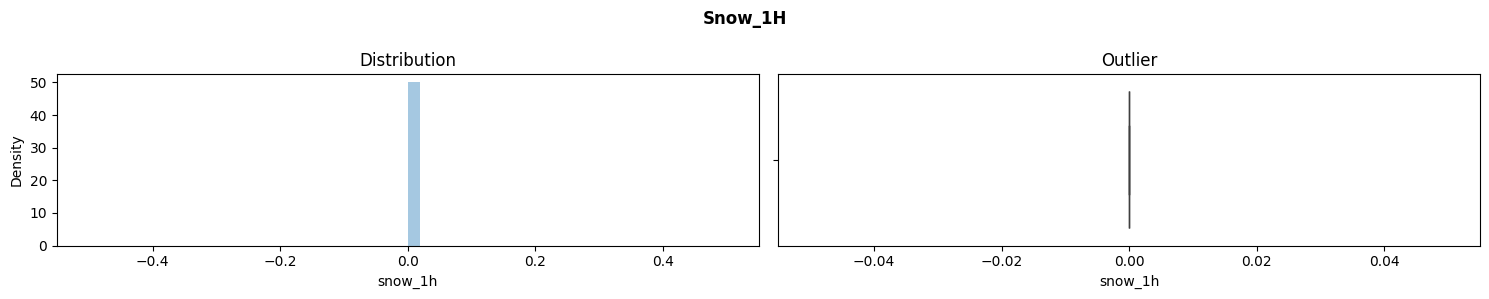

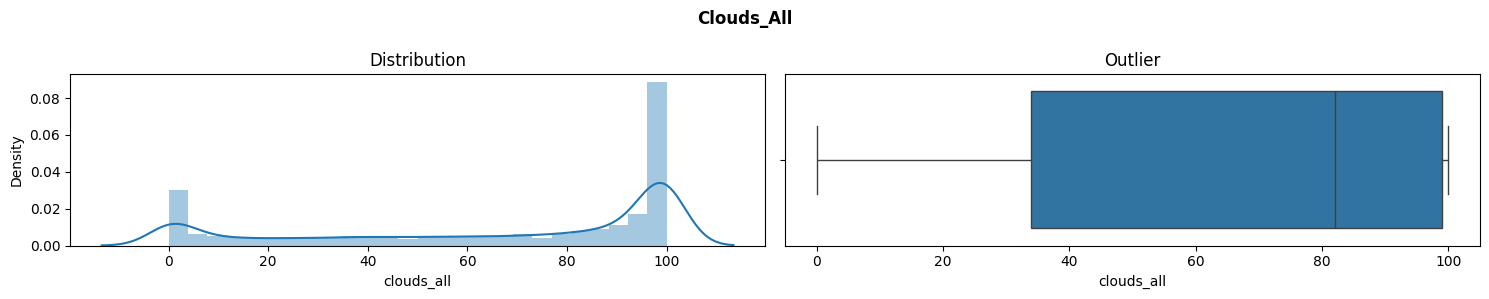

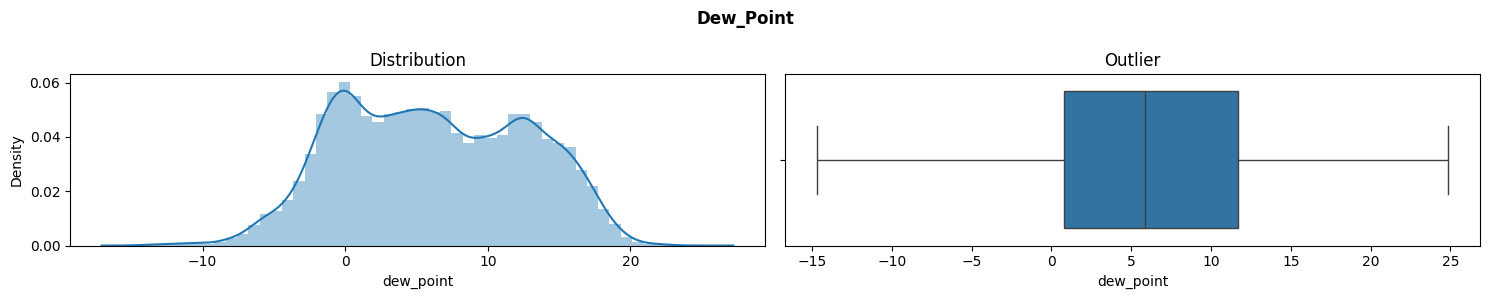

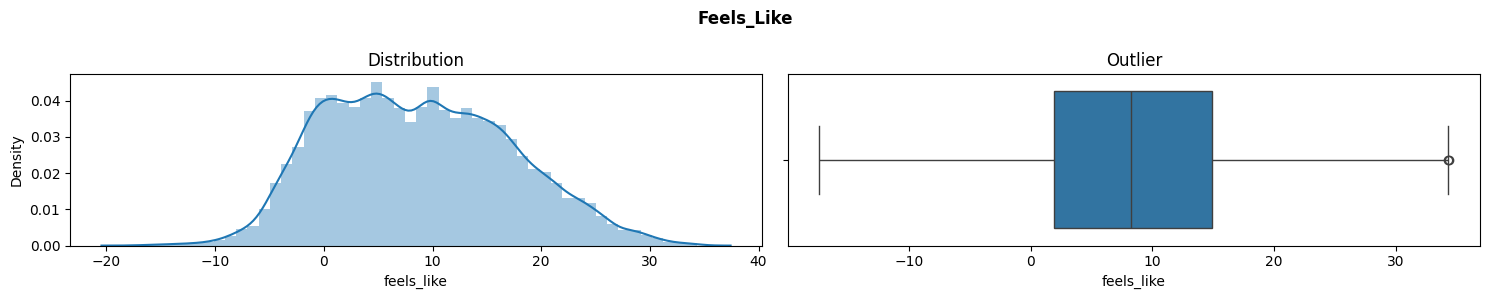

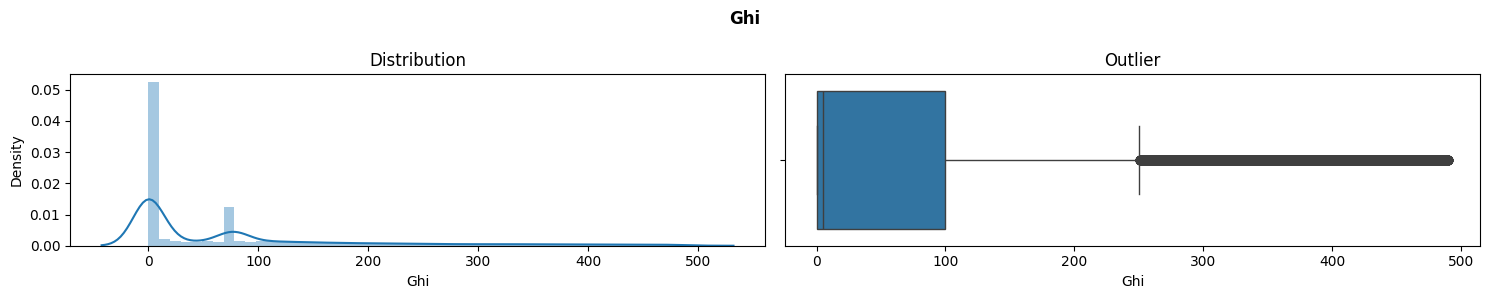

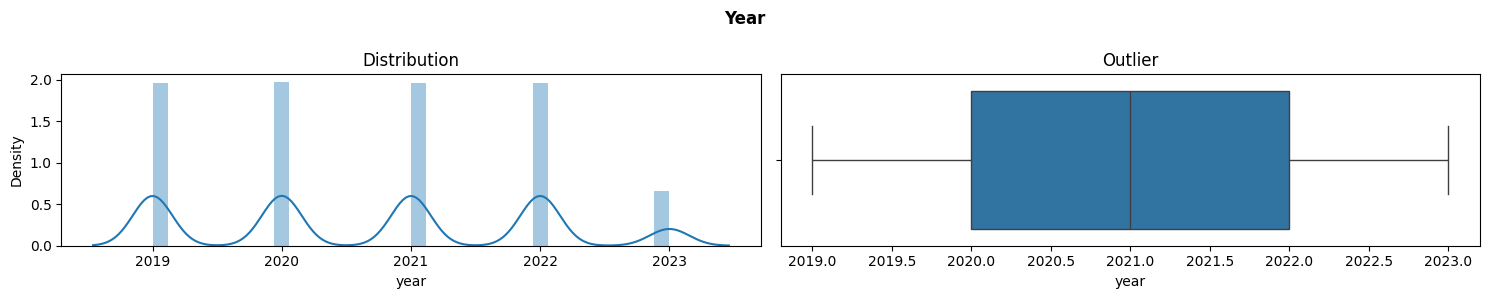

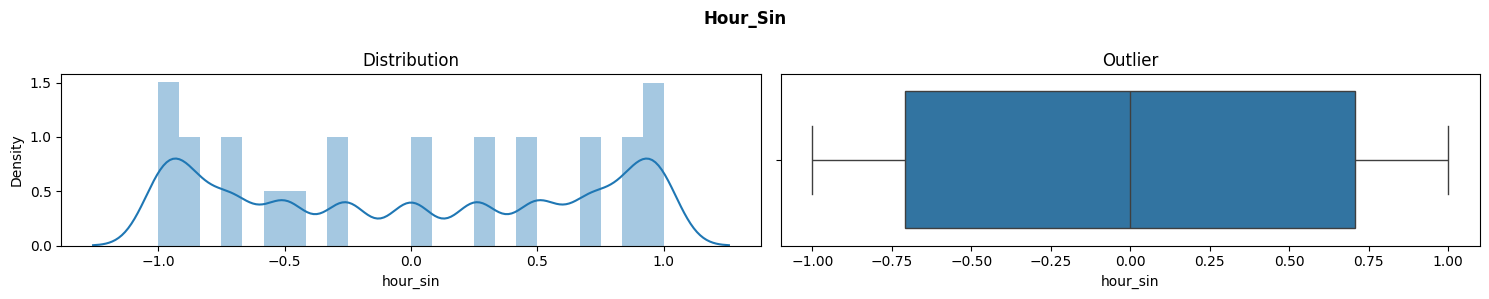

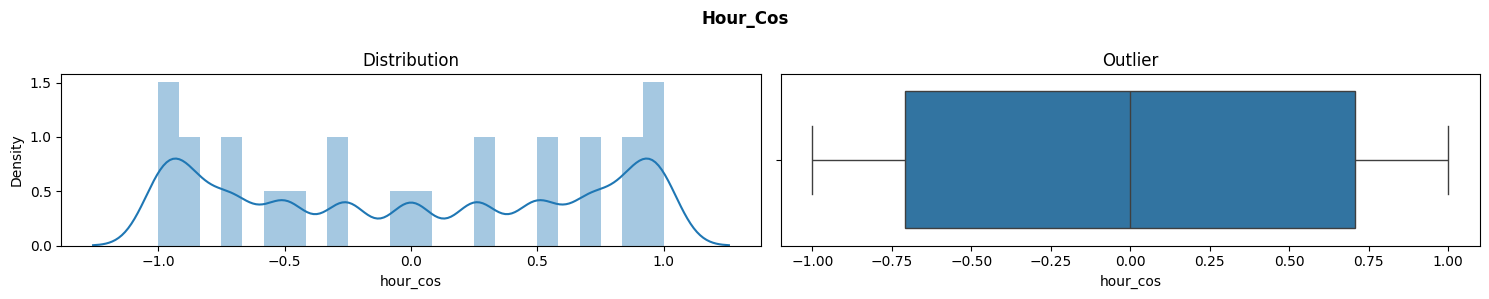

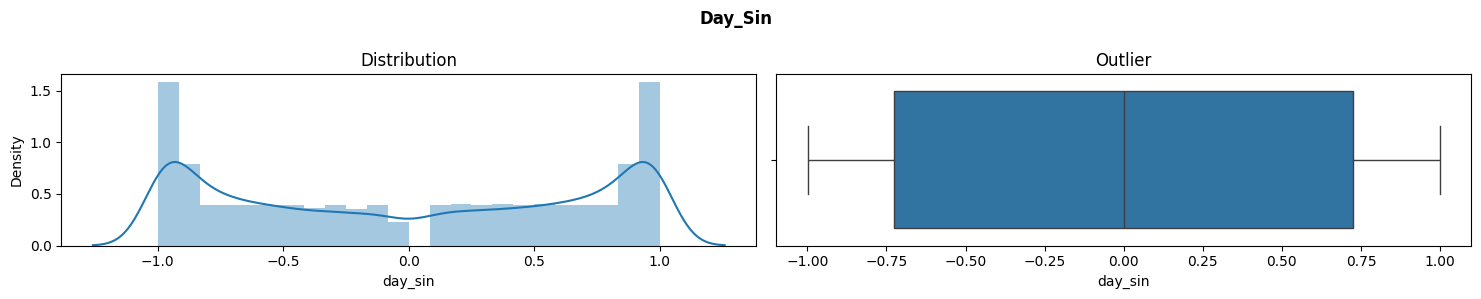

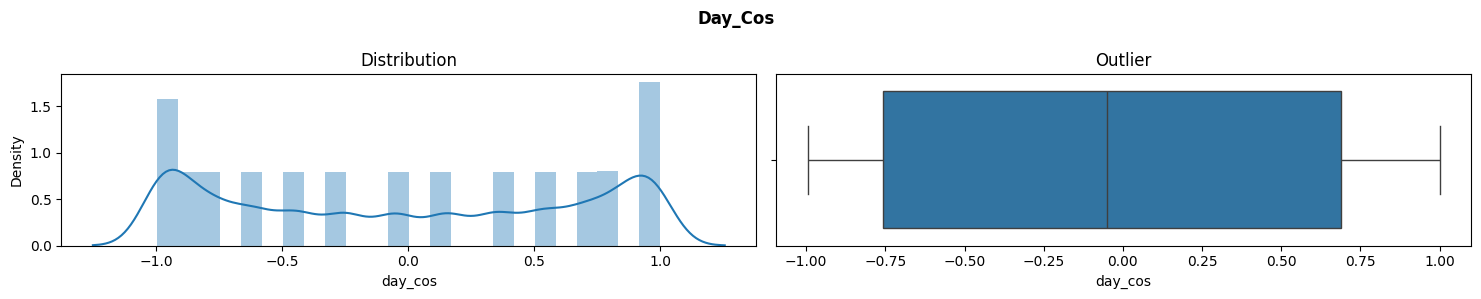

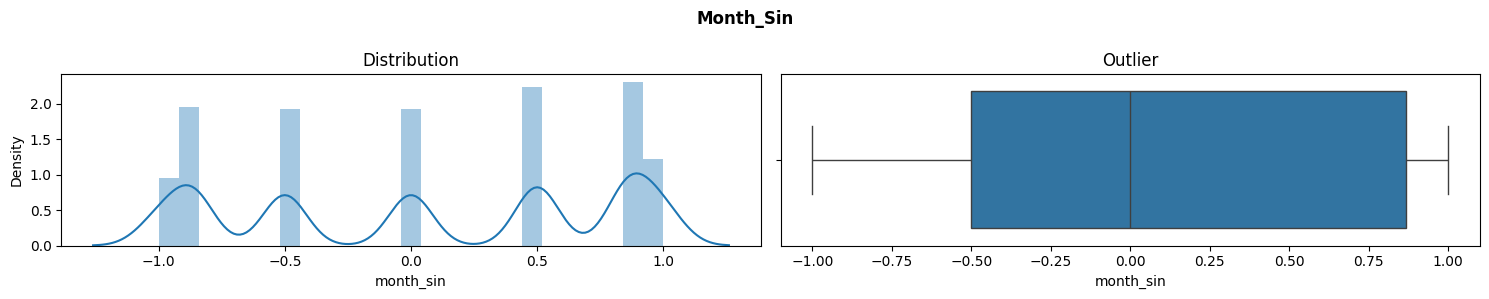

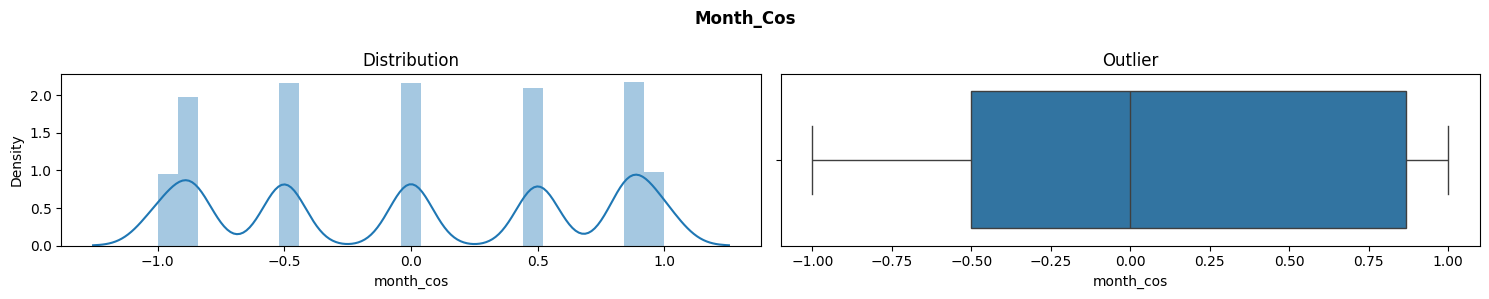

In [261]:
plot_graph(data_new, data_new.columns)

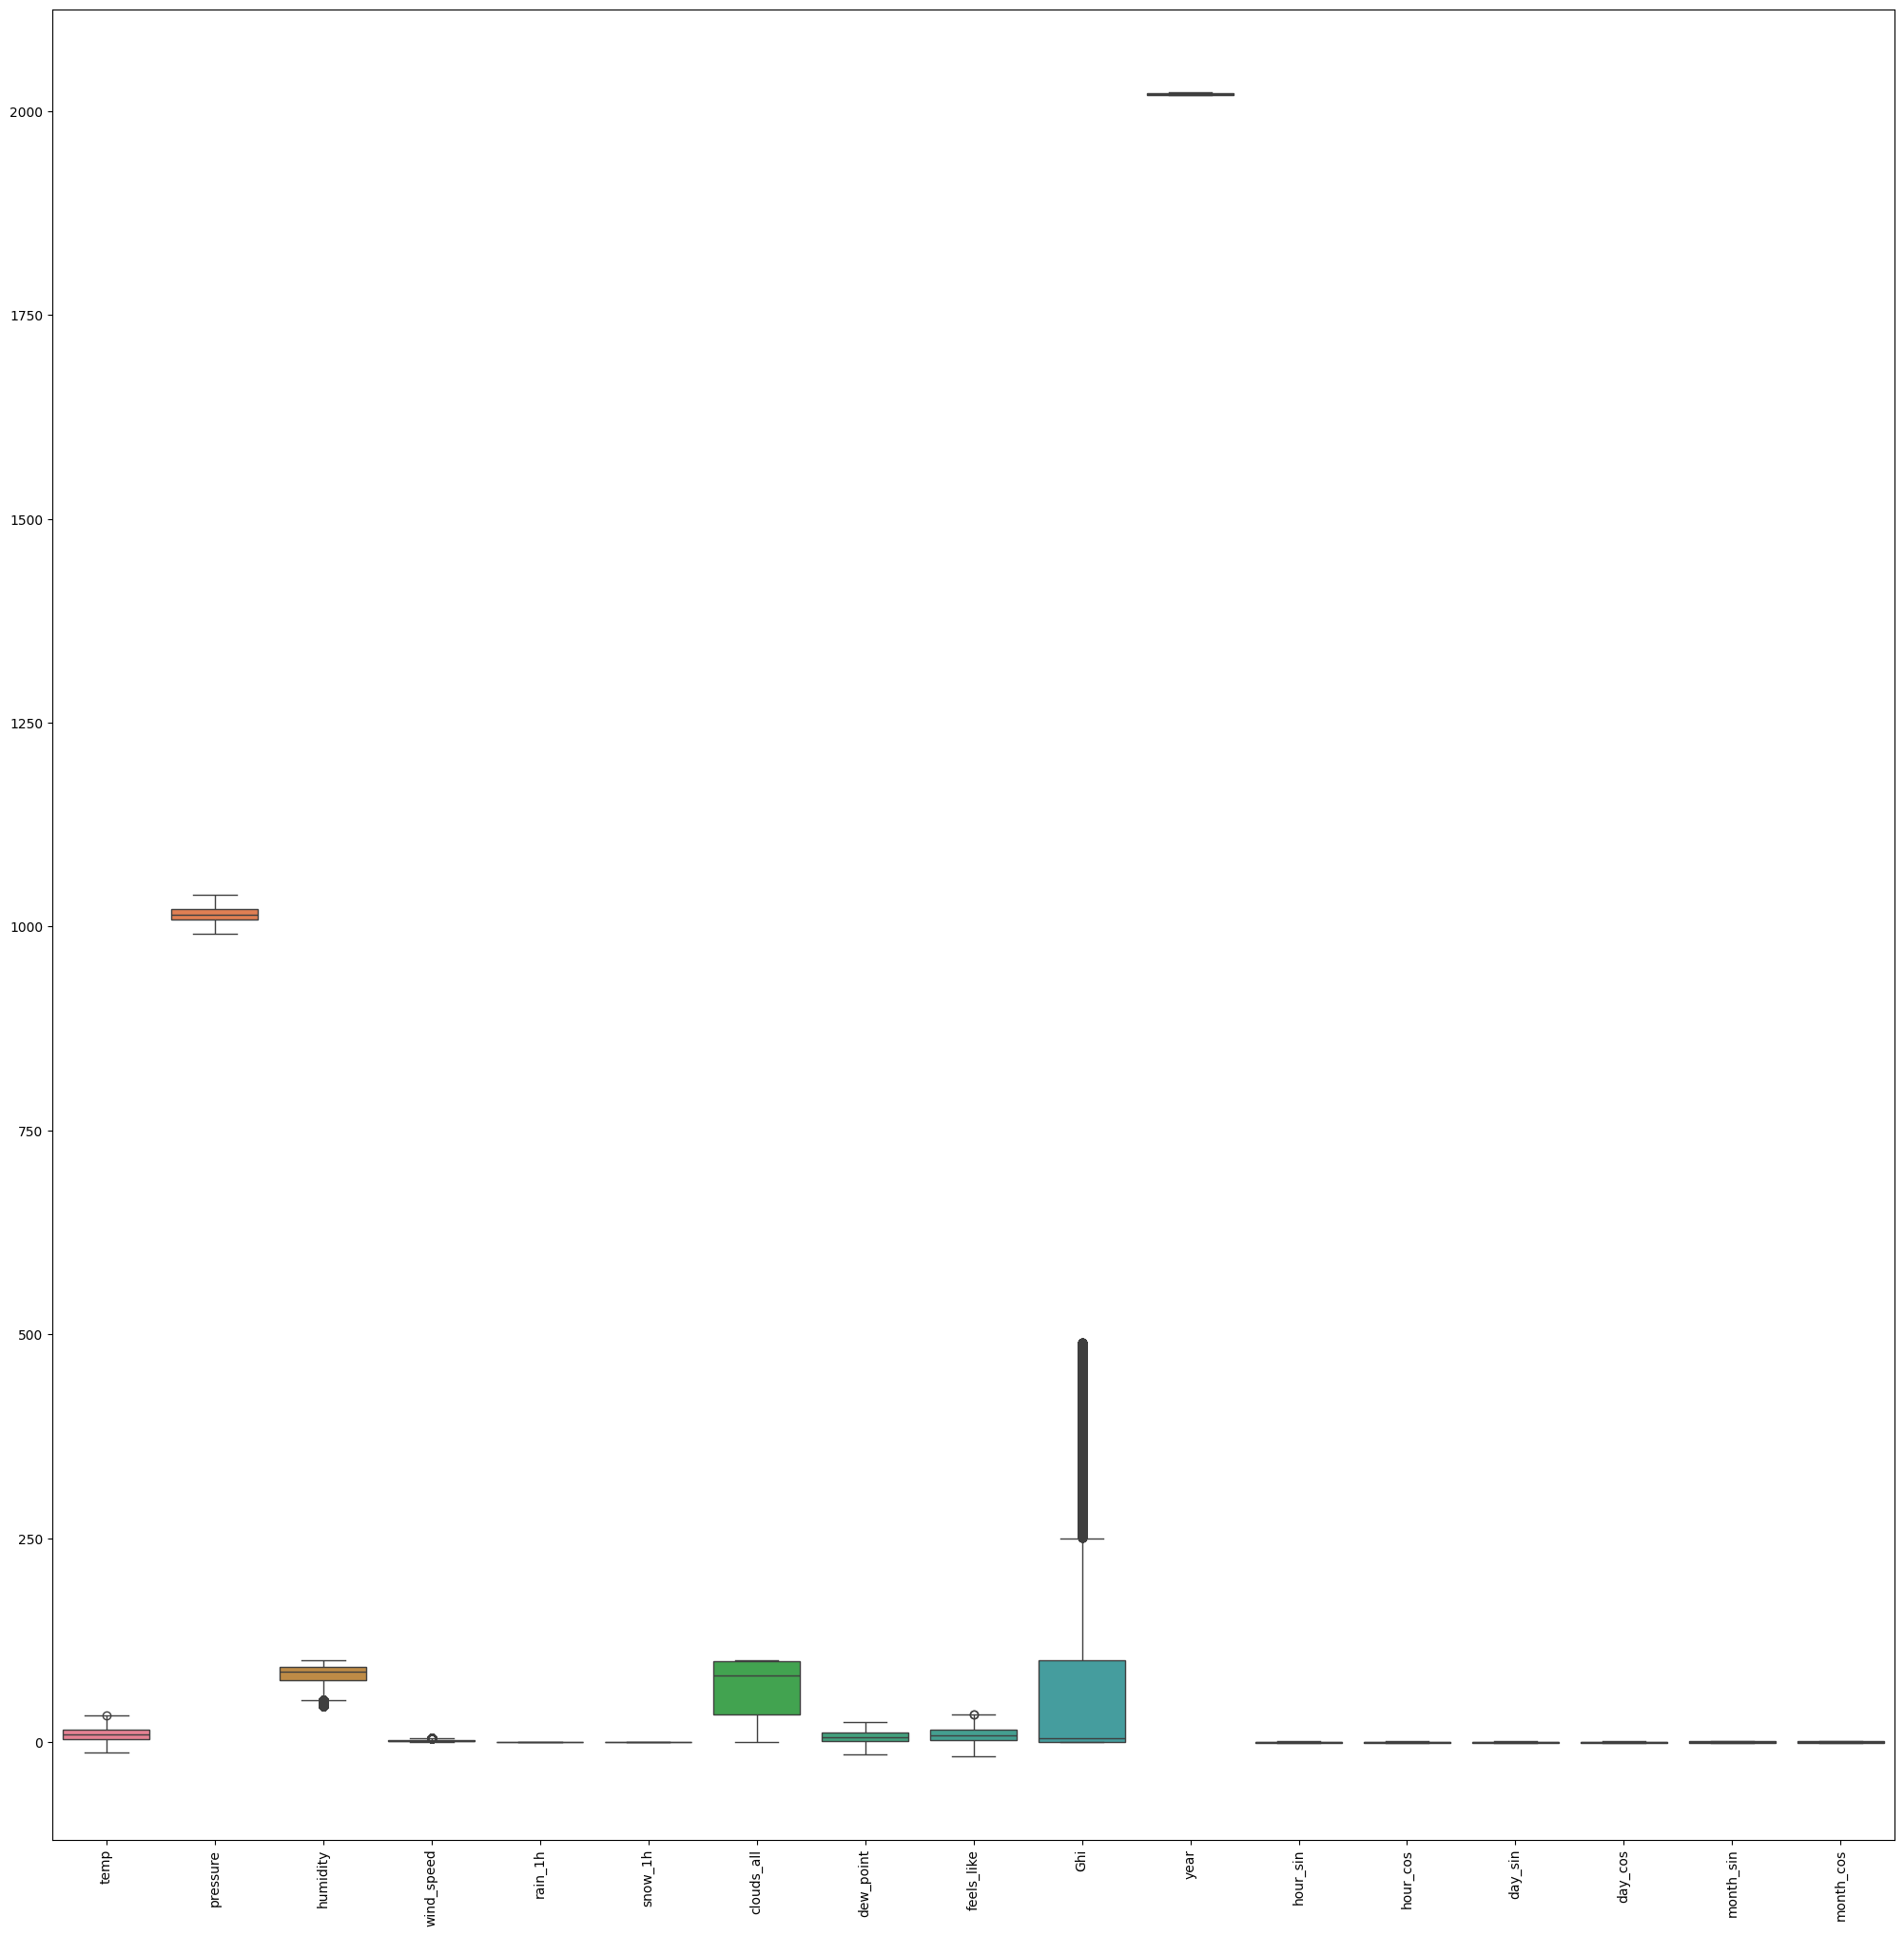

In [262]:
# check the outliers by plot the box plot
plt.figure(figsize=(25,25))
sns.boxplot(data=data_new)
plt.xticks(rotation=90)
plt.show()

In [263]:
df = data_new.copy()

In [264]:
# SPLIT DATASET 70:20:10
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.2)
val_size = len(df) - train_size - test_size

train = df[:train_size]
test = df[train_size:train_size + test_size]
val = df[train_size + test_size:]

In [265]:
X_train = train.drop(['temp'], axis=1)
y_train = train['temp']

X_test = test.drop(['temp'], axis=1)
y_test = test['temp']

X_val = val.drop(['temp'], axis=1)
y_val = val['temp']

In [266]:
X_train.head()

,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,1029.0,95.0,1.82,0.0,0.0,100.0,2.96,2.05,0.0,2019.0,0.000000,1.000000,0.201299,0.97953,0.5,0.866025
1,1029.0,95.0,1.87,0.0,0.0,98.0,2.79,1.78,0.0,2019.0,0.258819,0.965926,0.201299,0.97953,0.5,0.866025
2,1028.0,95.0,0.45,0.0,0.0,99.0,2.85,3.57,0.0,2019.0,0.500000,0.866025,0.201299,0.97953,0.5,0.866025
3,1028.0,95.0,0.45,0.0,0.0,100.0,2.85,3.57,0.0,2019.0,0.707107,0.707107,0.201299,0.97953,0.5,0.866025
4,1027.0,95.0,0.45,0.0,0.0,100.0,2.91,3.63,0.0,2019.0,0.866025,0.500000,0.201299,0.97953,0.5,0.866025


In [267]:
cols = X_train.columns.tolist()
cols

['pressure',
 'humidity',
 'wind_speed',
 'rain_1h',
 'snow_1h',
 'clouds_all',
 'dew_point',
 'feels_like',
 'Ghi',
 'year',
 'hour_sin',
 'hour_cos',
 'day_sin',
 'day_cos',
 'month_sin',
 'month_cos']

In [268]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()

X_train_std = X_train.copy()
X_train_std[cols] = scaler.fit_transform(X_train[cols])

X_test_std = X_test.copy()
X_test_std[cols] = scaler.transform(X_test[cols])

In [269]:
X_train_std.head()

,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,dew_point,feels_like,Ghi,year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,1.250000,0.529412,0.364341,0.0,0.0,0.283582,-0.249775,-0.496546,-0.059406,-0.5,-8.659561e-17,0.707107,0.138866,0.711585,0.5,0.633975
1,1.250000,0.529412,0.403101,0.0,0.0,0.253731,-0.265104,-0.517268,-0.059406,-0.5,1.830127e-01,0.683013,0.138866,0.711585,0.5,0.633975
2,1.166667,0.529412,-0.697674,0.0,0.0,0.268657,-0.259693,-0.379893,-0.059406,-0.5,3.535534e-01,0.612372,0.138866,0.711585,0.5,0.633975
3,1.166667,0.529412,-0.697674,0.0,0.0,0.283582,-0.259693,-0.379893,-0.059406,-0.5,5.000000e-01,0.500000,0.138866,0.711585,0.5,0.633975
4,1.083333,0.529412,-0.697674,0.0,0.0,0.283582,-0.254283,-0.375288,-0.059406,-0.5,6.123724e-01,0.353553,0.138866,0.711585,0.5,0.633975


In [270]:
# Import the required libraries
from tqdm.auto import tqdm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [271]:
# Evaluate the regression model's performance using various metrics.
def evaluate_regression_model(model_name, y_true, y_pred):

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate R-squared (R2) score
    r2 = r2_score(y_true, y_pred)

    evaluation_metrics = {
        'Model':model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2_Score': r2,
    }

    return pd.DataFrame.from_dict([evaluation_metrics]).set_index('Model')

In [272]:
# list down all the models that need to train on data
MODELS = [
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('Lasso Regression', Lasso()),
]

In [273]:
MODELS_RES = []

for name, model in tqdm(MODELS, desc='Model Training'):
    print(f"Training {name}...", end='')
    model.fit(X_train_std, y_train) # fit the model
    y_pred = model.predict(X_test_std) # test the model

    res_ = evaluate_regression_model(name, y_test, y_pred) # evaluate the model
    MODELS_RES.append(res_) # append res in a list
    print("done.")

Model Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training KNeighborsRegressor...done.
Training Lasso Regression...done.


In [274]:
# concatenate all the models results
final_res = pd.concat(MODELS_RES).sort_values(by='RMSE')
final_res

,MSE,RMSE,MAE,R2_Score
Model,,,,
Lasso Regression,3.520136,1.876202,1.39511,0.941074
KNeighborsRegressor,5.504293,2.346123,1.79038,0.907859


In [275]:
model_res = final_res.reset_index()
# Find the model with the lowest RMSE
best_model = model_res.loc[model_res['RMSE'].idxmin()]

print("Best Model (lowest RMSE):")
print(best_model)

Best Model (lowest RMSE):
Model       Lasso Regression
MSE                 3.520136
RMSE                1.876202
MAE                  1.39511
R2_Score            0.941074
Name: 0, dtype: object


In [276]:
# make a function that will calculate the residuals/error
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals/Error'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

print(df_results)

       Actual  Linear Regression  Polynomial Regression  Lasso Regression  \
0   28.820262          38.236015              27.712716         26.207208   
1   22.000786          15.261991              21.282649         25.317047   
2   24.893690          18.541265              28.192669         24.657362   
3   31.204466          36.051450              33.170257         29.844110   
4   29.337790          23.472173              31.258185         30.670556   
..        ...                ...                    ...               ...   
95  23.532866          22.675134              26.943540         22.009881   
96  20.052500          23.911453              20.345675         21.768348   
97  28.929352          33.046873              30.678214         31.211556   
98  20.634560          31.450740              19.436213         23.567718   
99  22.009947          28.692587              23.120114         23.715051   

    KNeighborsRegressor  
0             28.221608  
1             20.884889

In [277]:
# get the best model
model_names = [model[0] for model in MODELS]
index = model_names.index(best_model['Model'])
regressor = MODELS[index][1]
regressor.fit(X_train_std, y_train)

Lasso()

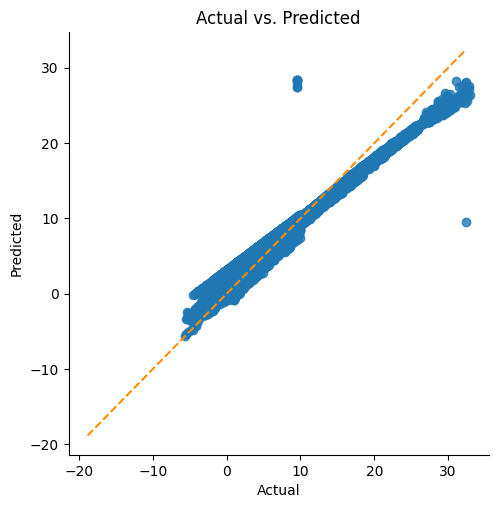

In [278]:
# Plotting the diagonal line
df_results = calculate_residuals(regressor, X_test_std, y_test)
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,
         color='darkorange', linestyle='--')
plt.title('Actual vs. Predicted')
plt.show()

# Features Selection through SHAP

In [279]:
!pip install shap


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [280]:
import shap
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

In [281]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 97%|=================== | 7385/7602 [00:19<00:00]       

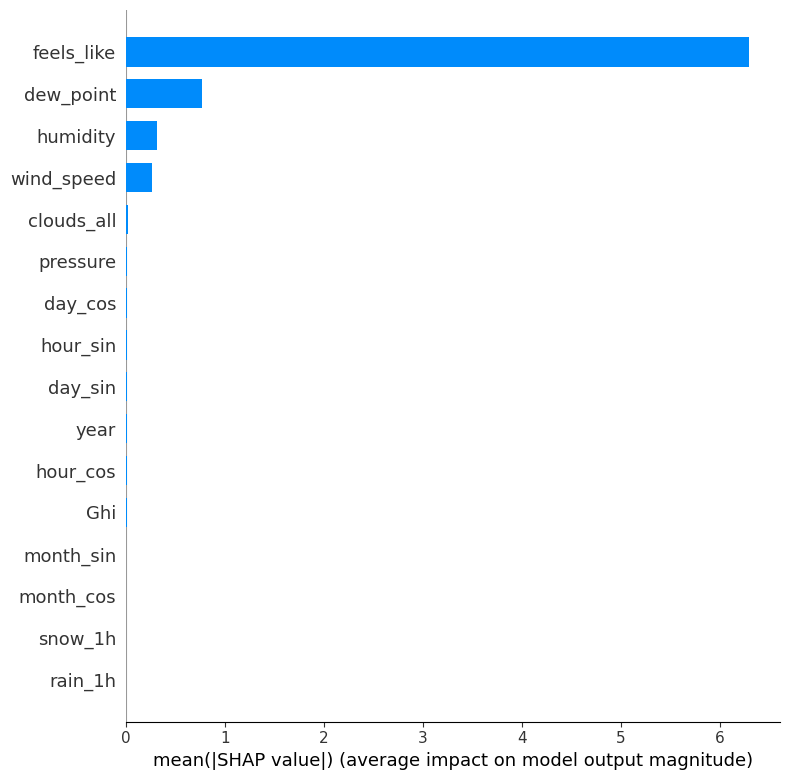

In [282]:
# Train an XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [283]:
# Get the mean absolute SHAP values for feature importance
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
feature_importance = np.abs(shap_values_df).mean().sort_values(ascending=False)
print("Feature importance:\n", feature_importance)

Feature importance:
 feels_like    6.289327
dew_point     0.768124
humidity      0.316252
wind_speed    0.265767
clouds_all    0.022590
pressure      0.012370
day_cos       0.012058
hour_sin      0.009035
day_sin       0.008287
year          0.008030
hour_cos      0.007895
Ghi           0.006653
month_sin     0.003841
month_cos     0.003600
snow_1h       0.000000
rain_1h       0.000000
dtype: float64


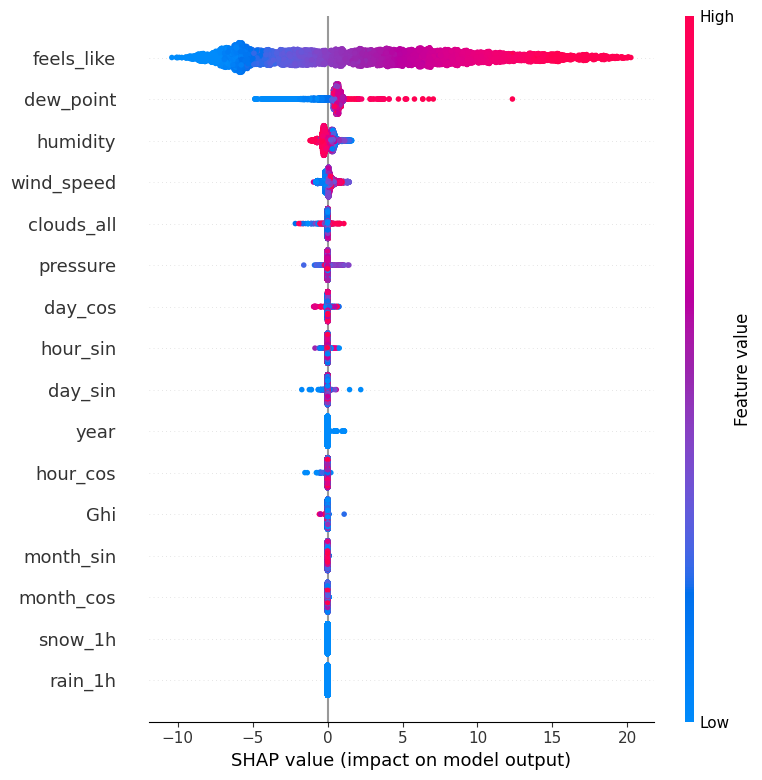

In [284]:
shap.summary_plot(shap_values, X_test)

In [285]:
df_importance = feature_importance.to_frame().reset_index().rename(columns={'index': 'feature', 0: 'Importance'}).sort_values(by='Importance', ascending=False)
df_importance

,feature,Importance
0,feels_like,6.289327
1,dew_point,0.768124
2,humidity,0.316252
3,wind_speed,0.265767
4,clouds_all,0.022590
5,pressure,0.012370
6,day_cos,0.012058
7,hour_sin,0.009035
8,day_sin,0.008287
9,year,0.008030


In [286]:
# Calculate cumulative importance
df_importance['Cumulative_Importance'] = df_importance['Importance'].cumsum() / df_importance['Importance'].sum()

# Select features until 95% cumulative importance is reached
selected_features = df_importance[df_importance['Cumulative_Importance'] < 0.96]['feature'].tolist()

print("Selected features based on cumulative importance threshold:", selected_features)

Selected features based on cumulative importance threshold: ['feels_like', 'dew_point', 'humidity']


In [287]:
df_importance

,feature,Importance,Cumulative_Importance
0,feels_like,6.289327,0.813223
1,dew_point,0.768124,0.912543
2,humidity,0.316252,0.953435
3,wind_speed,0.265767,0.987799
4,clouds_all,0.022590,0.990720
5,pressure,0.012370,0.992320
6,day_cos,0.012058,0.993879
7,hour_sin,0.009035,0.995047
8,day_sin,0.008287,0.996119
9,year,0.008030,0.997157


In [288]:
selected_features

['feels_like', 'dew_point', 'humidity']

In [289]:
X_train_std = X_train_std[selected_features]
X_test_std = X_test_std[selected_features]

In [290]:
X_test_std.head()

,feels_like,dew_point,humidity
26608,-0.937836,-0.743012,0.294118
26609,-1.033001,-0.815149,0.352941
26610,-0.864927,-0.842200,0.411765
26611,-1.041443,-0.854824,0.411765
26612,-1.035303,-0.841298,0.470588


In [291]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


MODELS_RES = []

for name, model in tqdm(MODELS, desc='Model Training'):
    print(f"Training {name}...", end='')
    model.fit(X_train_std, y_train)  # fit the model
    y_pred = model.predict(X_test_std)  # test the model

    res_ = evaluate_regression_model(name, y_test, y_pred)  # evaluate the model
    MODELS_RES.append(res_)  # append res in a list
    print("done.")



Model Training: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 44.07it/s]

Training KNeighborsRegressor...done.
Training Lasso Regression...done.


In [292]:
# concatenate all the models results
final_res = pd.concat(MODELS_RES).sort_values(by='RMSE')
final_res

,MSE,RMSE,MAE,R2_Score
Model,,,,
KNeighborsRegressor,0.154499,0.393064,0.109783,0.997414
Lasso Regression,3.520136,1.876202,1.395110,0.941074


Initially, linear regression model yielded a Root Mean Squared Error (RMSE) of 3.316. After enhancing the model by removing outliers and adding features like 'dew_point' and 'feels_like', we observed improved performance, with the KNeighborsRegressor achieving an RMSE of 2.346 and an R2 score of 0.907. Further, utilizing SHAP feature importance significantly boosted the model's performance, resulting in the KNeighborsRegressor attaining an exceptional RMSE of 0.393 and an R2 score of 0.997.

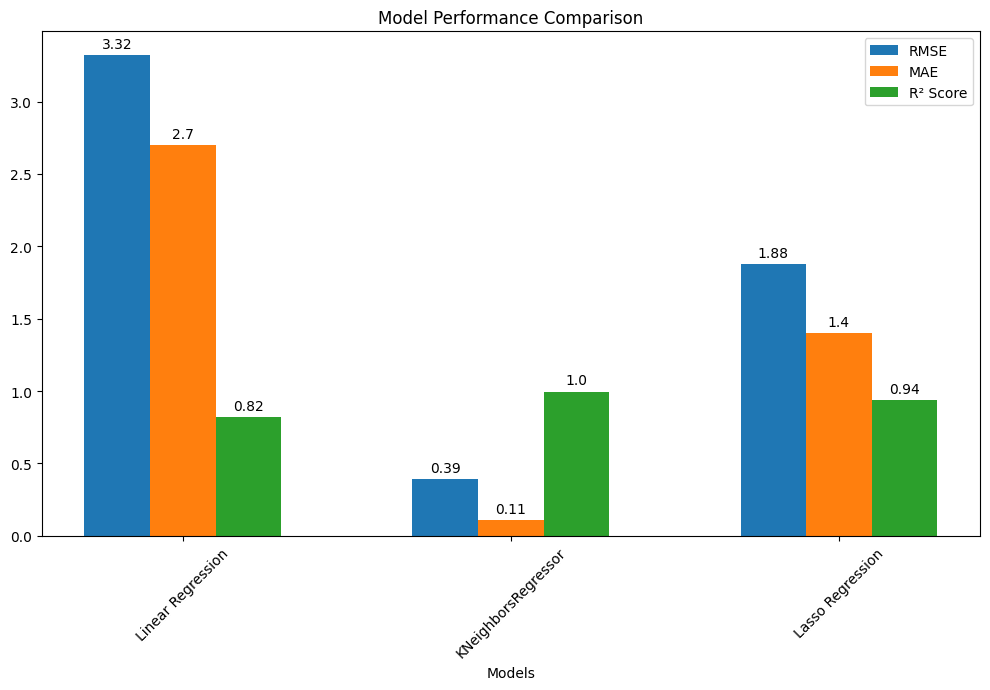

In [334]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance metrics
models = ['Linear Regression', 'KNeighborsRegressor', 'Lasso Regression']
mse = [11.01, 0.15, 3.52]
rmse = [3.32, 0.39, 1.88]
mae = [2.70, 0.11, 1.40]
r2 = [0.82, 0.997, 0.94]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bars
bar1 = ax1.bar(x - width, rmse, width, label='RMSE')
bar2 = ax1.bar(x, mae, width, label='MAE')
bar3 = ax1.bar(x + width, r2, width, label='R² Score')

# Adding text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Models')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# Adding values on top of bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax1.annotate('{}'.format(round(height, 2)),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_value_labels(bar1)
add_value_labels(bar2)
add_value_labels(bar3)

fig.tight_layout()

plt.xticks(rotation=45)
plt.show()



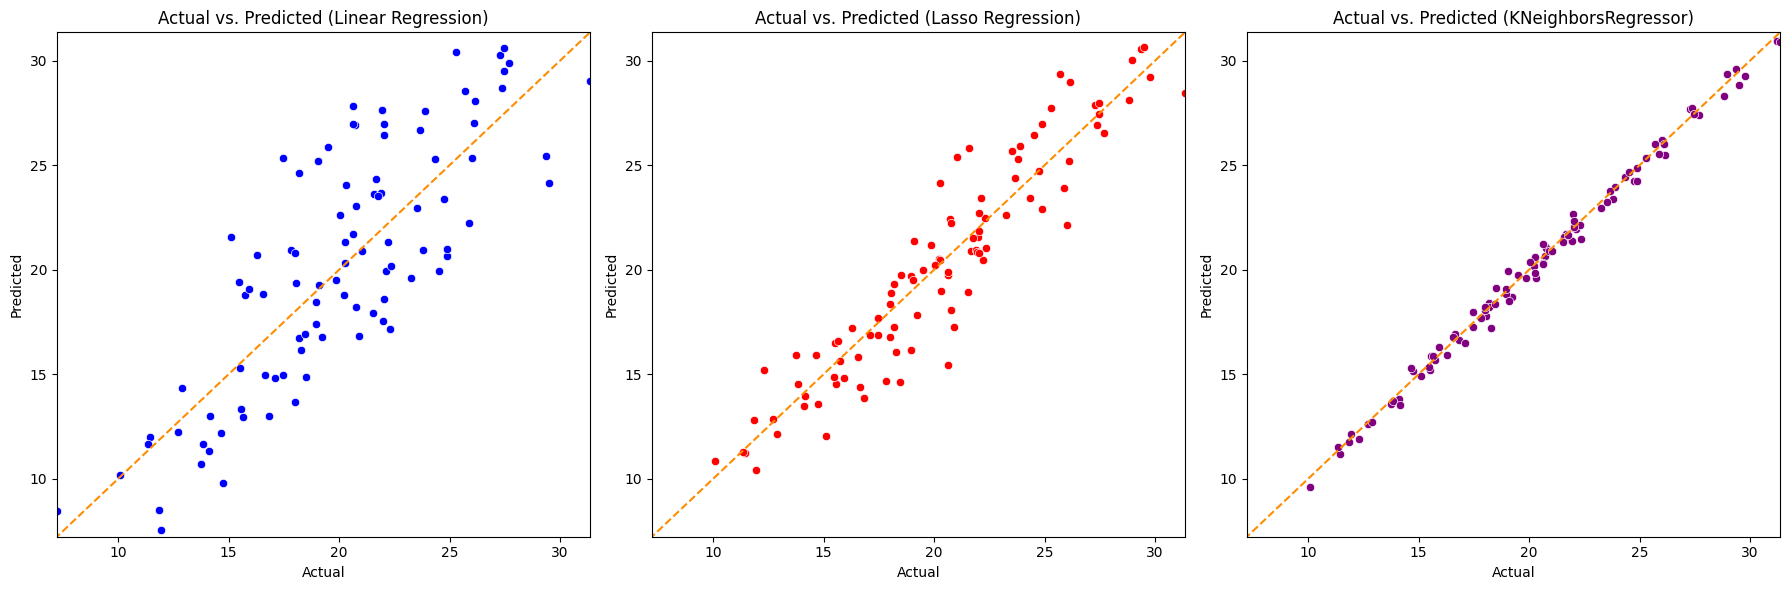

In [335]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#df_results is a DataFrame containing actual and predicted values for each model

np.random.seed(0)

# Example data
actual = np.random.normal(20, 5, 100)  # Actual values
predicted_lr = actual + np.random.normal(0, 3.32, 100)  # Linear Regression predictions
predicted_lasso = actual + np.random.normal(0, 1.88, 100)  # Lasso Regression predictions
predicted_knn = actual + np.random.normal(0, 0.39, 100)  # KNeighborsRegressor predictions

# Create a DataFrame
df_results = pd.DataFrame({
    'Actual': actual,
    'Linear Regression': predicted_lr,
    'Lasso Regression': predicted_lasso,
    'KNeighborsRegressor': predicted_knn
})

# Plotting the Actual vs. Predicted scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = ['Linear Regression', 'Lasso Regression', 'KNeighborsRegressor']
colors = ['blue', 'red', 'purple']
line_coords = np.arange(df_results.min().min(), df_results.max().max())

for ax, model, color in zip(axes.flatten(), models, colors):
    sns.scatterplot(x='Actual', y=model, data=df_results, ax=ax, color=color)
    ax.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    ax.set_title(f'Actual vs. Predicted ({model})')
    ax.set_xlim(df_results['Actual'].min(), df_results['Actual'].max())
    ax.set_ylim(df_results['Actual'].min(), df_results['Actual'].max())
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

plt.tight_layout()
plt.show()
